In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [4]:
df = pd.read_csv("merged1.csv")

In [6]:
df.head()

S.No.  State Code                   State Name  District Code  \
0     1        35.0  Andaman And Nicobar Islands          603.0   
1     2        35.0  Andaman And Nicobar Islands          632.0   
2     3        35.0  Andaman And Nicobar Islands          602.0   
3     4        28.0               Andhra Pradesh          745.0   
4     5        28.0               Andhra Pradesh          744.0   

              District Name                   State/UT  \
0                  Nicobars  Andaman & Nicobar Islands   
1  North And Middle Andaman                        NaN   
2            South Andaman   Andaman & Nicobar Islands   
3     Alluri Sitharama Raju                        NaN   
4                Anakapalli                        NaN   

   Number of Households surveyed  Number of Women age 15-49 years interviewed  \
0                          882.0                                        764.0   
1                            NaN                                          NaN   
2                          868.0                                        844.0   
3                            NaN                                          NaN   
4                            NaN                                          NaN   

   Number of Men age 15-54 years interviewed  \
0                                      125.0   
1                                        NaN   
2                                      134.0   
3                                        NaN   
4                                        NaN   

   Female population age 6 years and above who ever attended school (%)  ...  \
0                                               78.0                     ...   
1                                                NaN                     ...   
2                                               84.7                     ...   
3                                                NaN                     ...   
4                                                NaN                     ...   

   Men age 15 years and above wih Mildly elevated blood pressure (Systolic 140-159 mm of Hg and/or Diastolic 90-99 mm of Hg) (%)  \
0                                               32.9                                                                               
1                                                NaN                                                                               
2                                               17.9                                                                               
3                                                NaN                                                                               
4                                                NaN                                                                               

   Men age 15 years and above wih Moderately or severely elevated blood pressure (Systolic ≥160 mm of Hg and/or Diastolic ≥100 mm of Hg) (%)  \
0                                               11.1                                                                                           
1                                                NaN                                                                                           
2                                                6.1                                                                                           
3                                                NaN                                                                                           
4                                                NaN                                                                                           

   Men age 15 years and above wih Elevated blood pressure (Systolic ≥140 mm of Hg and/or Diastolic ≥90 mm of Hg) or taking medicine to control blood pressure (%)  \
0                                               47.0                                                                                                                
1    

In [16]:
# Display missing values summary
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]  # Keep only columns with missing values

print("Columns with missing values:\n", missing_summary)

Columns with missing values:
 S.No.                                                                                      1
State Code                                                                                 2
State Name                                                                                 2
District Code                                                                              2
District Name                                                                              2
                                                                                        ... 
Women (age 30-49 years) Ever undergone an oral cavity examination for oral cancer (%)    166
Women age 15 years and above who use any kind of tobacco (%)                             166
Men age 15 years and above who use any kind of tobacco (%)                               166
Women age 15 years and above who consume alcohol (%)                                     166
Men age 15 years and above who consume a

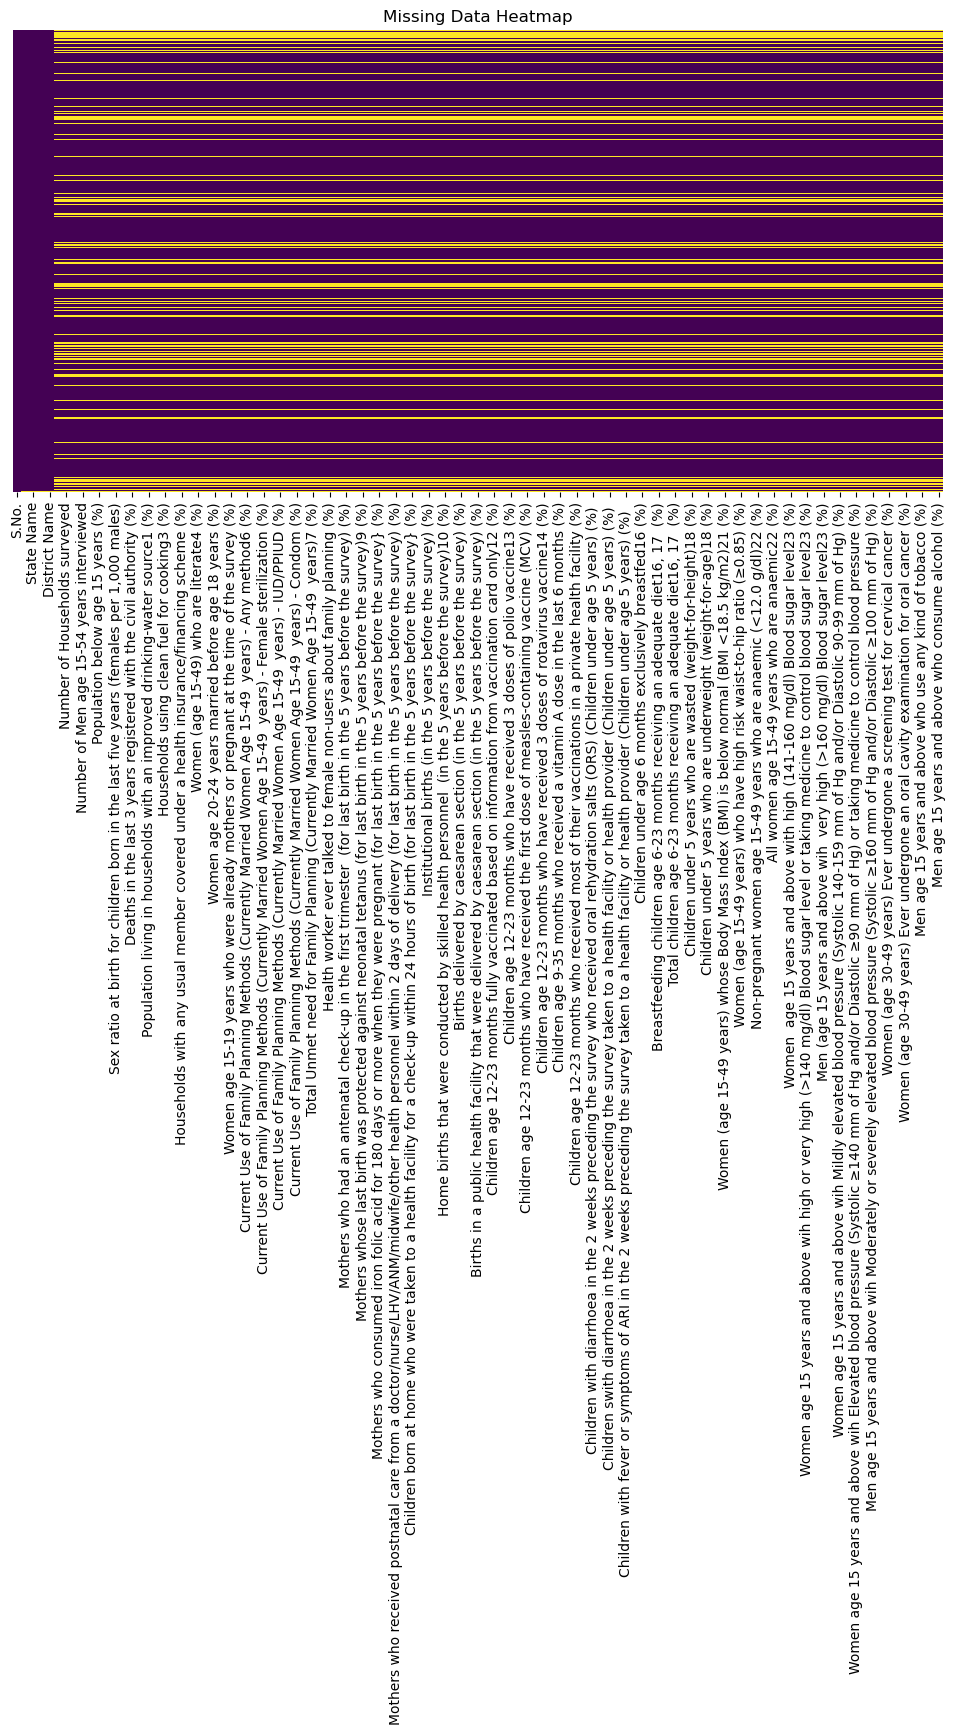

In [18]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()


In [24]:
from scipy.stats import skew  # Ensure this is properly imported

# Function to determine the best imputation method for each column
def choose_imputation_method(df):
    methods = {}

    for column in df.columns:
        if df[column].isnull().sum() > 0:  # Only process columns with missing values
            
            if np.issubdtype(df[column].dtype, np.number):  # Proper check for numerical columns
                column_skew = skew(df[column].dropna(), nan_policy='omit')  # Handle NaN properly
                
                if abs(column_skew) < 1:  # Normally distributed
                    methods[column] = "Mean"
                else:  # Skewed distribution
                    methods[column] = "Median"
            
            else:  # Categorical columns
                top_value_count = df[column].value_counts(normalize=True).iloc[0]  # Frequency of top category
                
                if top_value_count > 0.5:  # If one value is dominant
                    methods[column] = "Mode"
                else:
                    methods[column] = "Unknown"

    return methods


In [26]:
imputation_methods = choose_imputation_method(df)
print("\nSelected imputation methods:\n", imputation_methods)



Selected imputation methods:
 {'S.No.': 'Unknown', 'State Code': 'Mean', 'State Name': 'Unknown', 'District Code': 'Mean', 'District Name': 'Unknown', 'State/UT': 'Unknown', 'Number of Households surveyed': 'Median', 'Number of Women age 15-49 years interviewed': 'Mean', 'Number of Men age 15-54 years interviewed': 'Mean', 'Female population age 6 years and above who ever attended school (%)': 'Mean', 'Population below age 15 years (%)': 'Mean', ' Sex ratio of the total population (females per 1,000 males)': 'Mean', 'Sex ratio at birth for children born in the last five years (females per 1,000 males)': 'Median', 'Children under age 5 years whose birth was registered with the civil authority (%)': 'Median', 'Deaths in the last 3 years registered with the civil authority (%)': 'Unknown', 'Population living in households with electricity (%)': 'Median', 'Population living in households with an improved drinking-water source1 (%)': 'Median', 'Population living in households that use an i

In [36]:
def fill_missing_values(df):
    df_filled = df.copy()  # Create a copy to avoid modifying the original DataFrame

    methods = choose_imputation_method(df_filled)  # Get the best method for each column

    for column, method in methods.items():
        if method == "Mean":
            df_filled[column] = df_filled[column].fillna(df_filled[column].mean())  # Fix inplace warning
        elif method == "Median":
            df_filled[column] = df_filled[column].fillna(df_filled[column].median())  # Fix inplace warning
        elif method == "Mode":
            df_filled[column] = df_filled[column].fillna(df_filled[column].mode()[0])  # Fix inplace warning
        else:  # If "Unknown" for categorical columns
            df_filled[column] = df_filled[column].fillna("Unknown")  # Fix inplace warning

    return df_filled  # Return the modified DataFrame


In [38]:
df_cleaned = handle_missing_values(df, imputation_methods)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18276\1987400304.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[column].fillna("Unknown", inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18276\1987400304.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_column_changes(df_original, df_filled):
    """
    Analyzes changes in each column after filling missing values.
    Uses histograms for numerical columns and bar plots for categorical columns.
    """
    for column in df_original.columns:
        plt.figure(figsize=(10, 4))  # Set figure size

        if df_original[column].dtype in ['int64', 'float64']:  # Numerical columns
            sns.histplot(df_original[column], kde=True, color="red", label="Original", bins=30, alpha=0.5)
            sns.histplot(df_filled[column], kde=True, color="blue", label="Filled", bins=30, alpha=0.5)
            plt.xlabel(column)
            plt.title(f"Distribution Before vs After Missing Value Handling: {column}")

        else:  # Categorical columns
            original_counts = df_original[column].value_counts()
            filled_counts = df_filled[column].value_counts()

            # Convert to DataFrame for easy plotting
            compare_df = pd.DataFrame({'Original': original_counts, 'Filled': filled_counts}).fillna(0)

            compare_df.plot(kind='bar', figsize=(10, 4))
            plt.xlabel(column)
            plt.ylabel("Count")
            plt.title(f"Category Frequency Before vs After: {column}")

        plt.legend()
        plt.show()


<Figure size 1000x400 with 0 Axes>

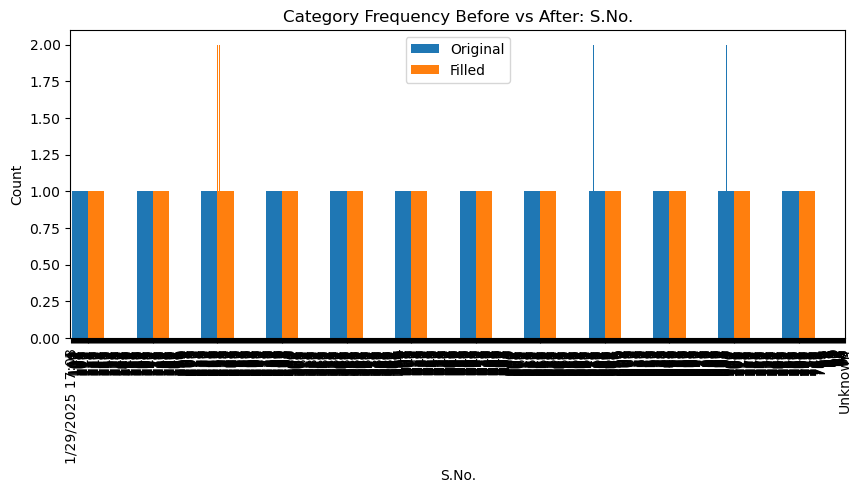

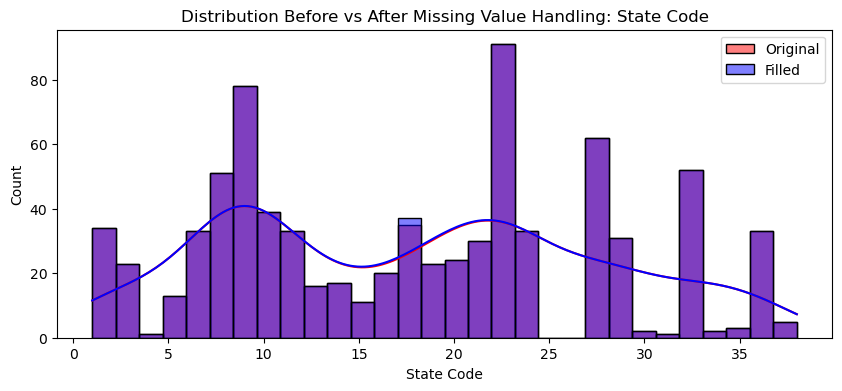

<Figure size 1000x400 with 0 Axes>

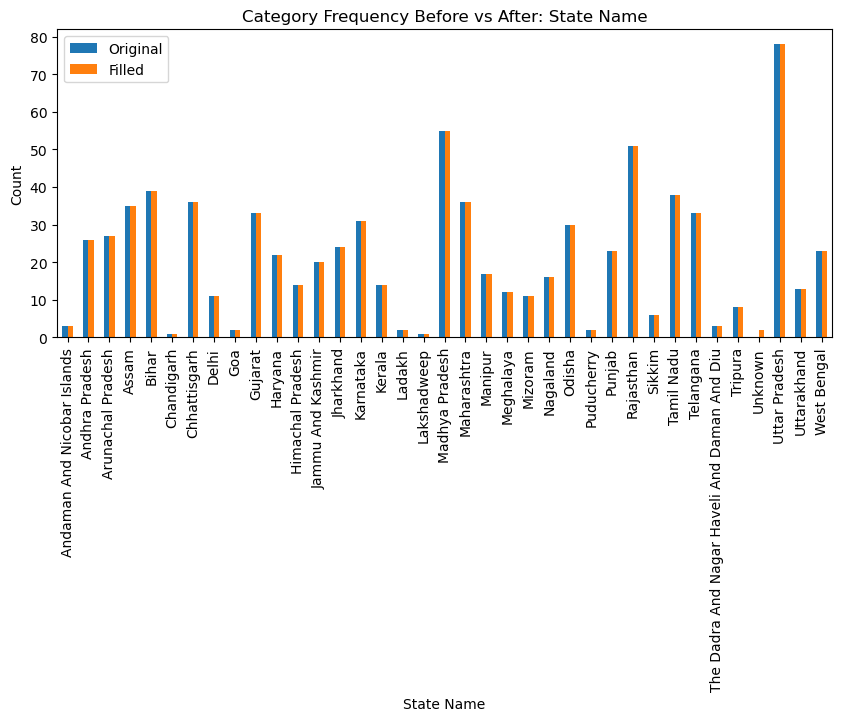

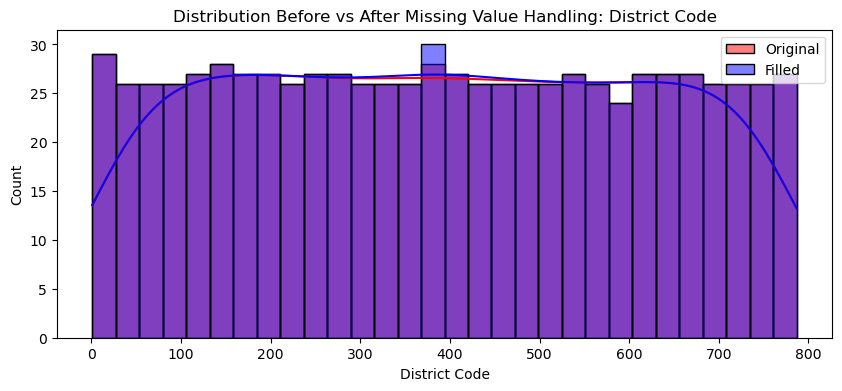

<Figure size 1000x400 with 0 Axes>

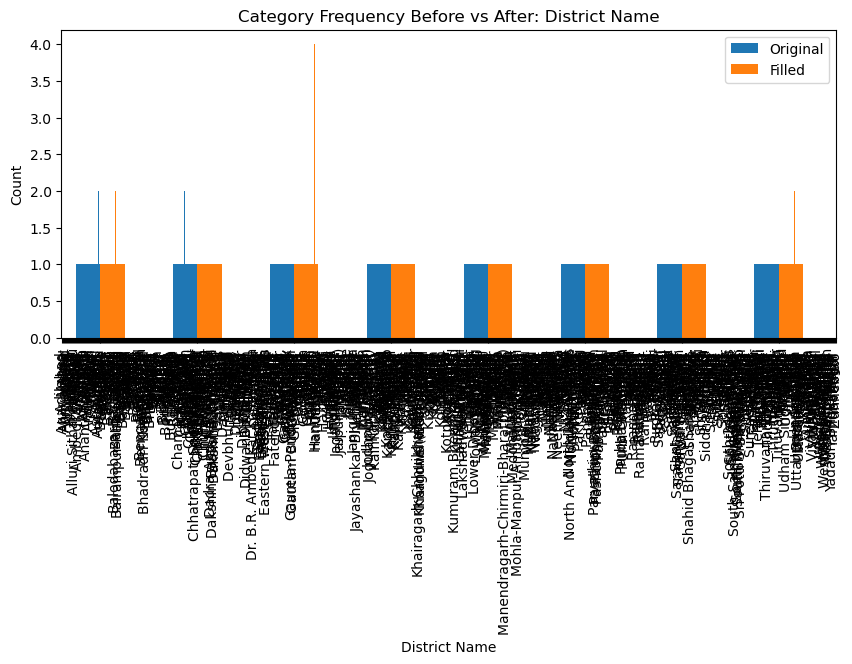

<Figure size 1000x400 with 0 Axes>

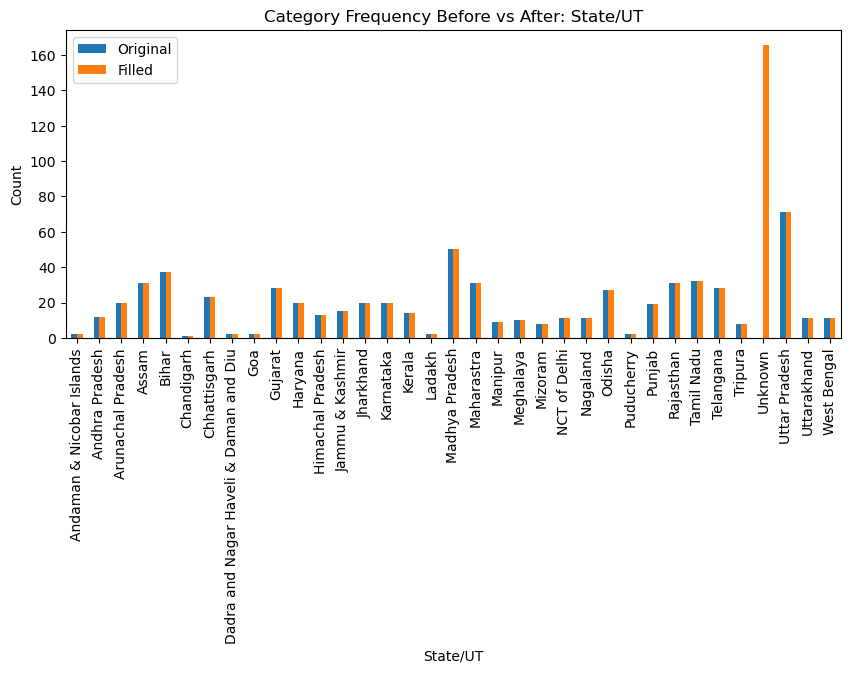

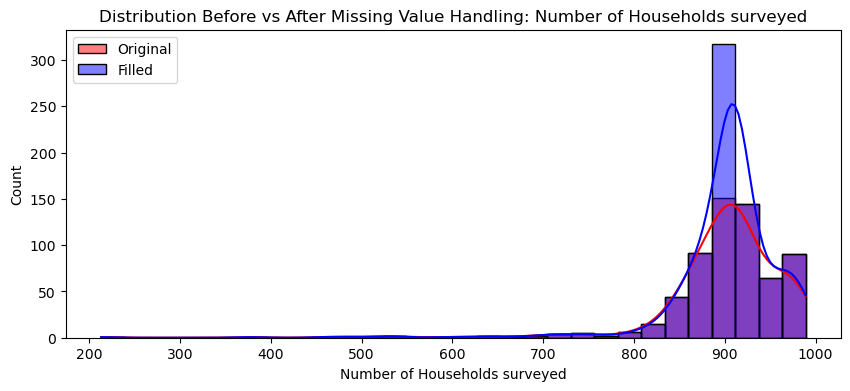

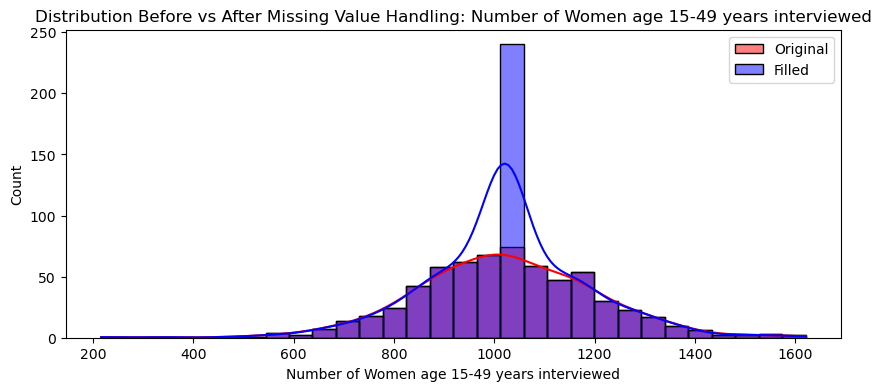

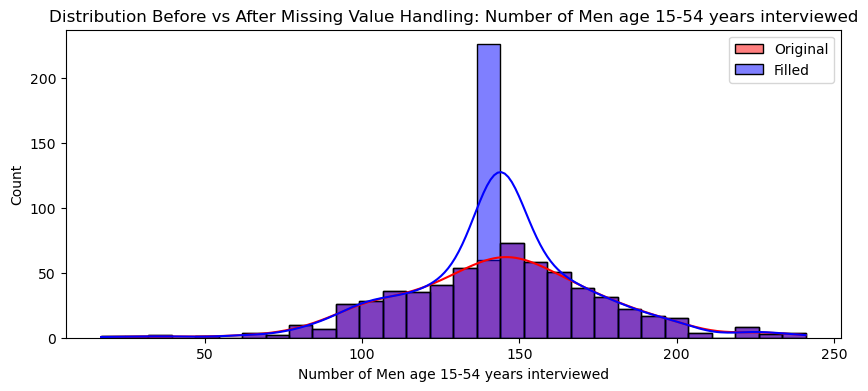

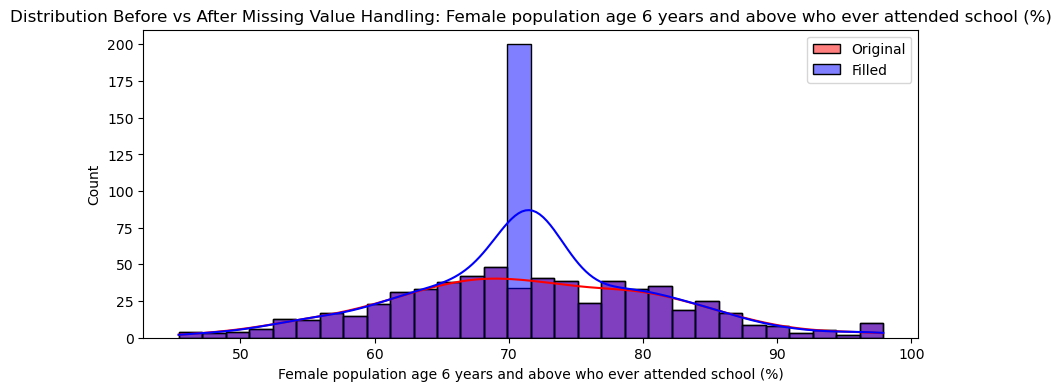

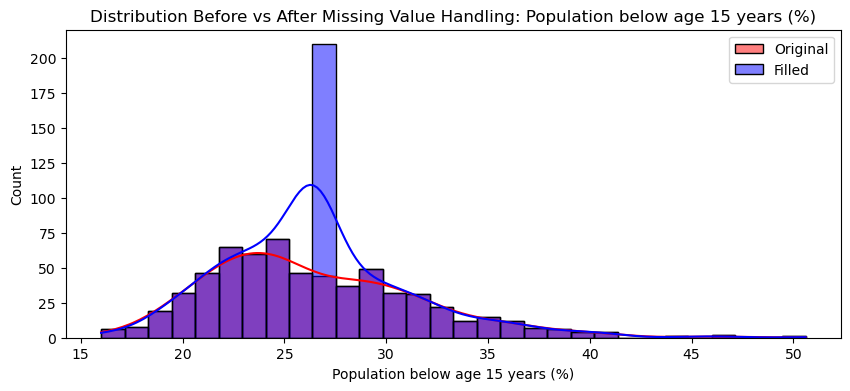

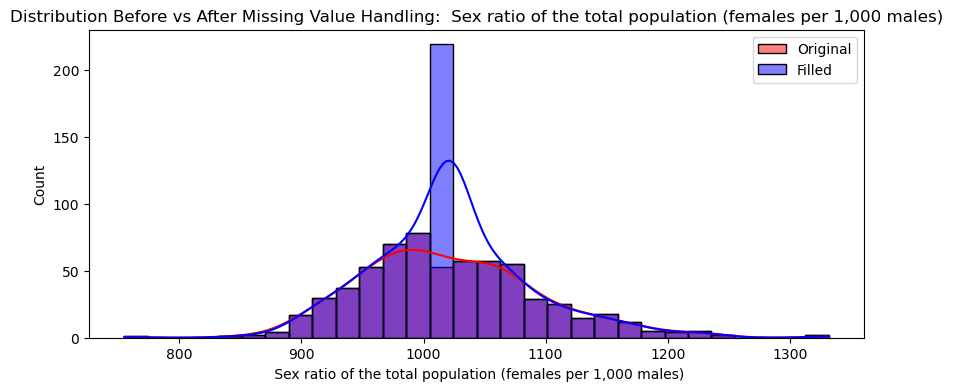

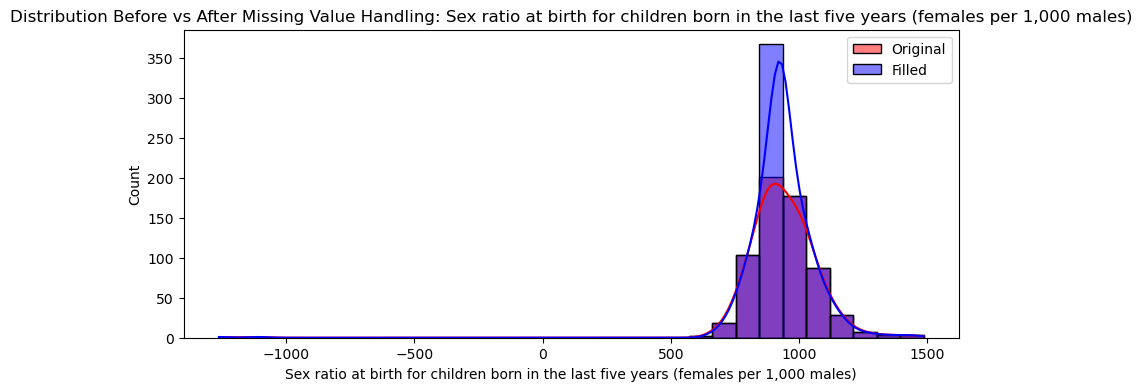

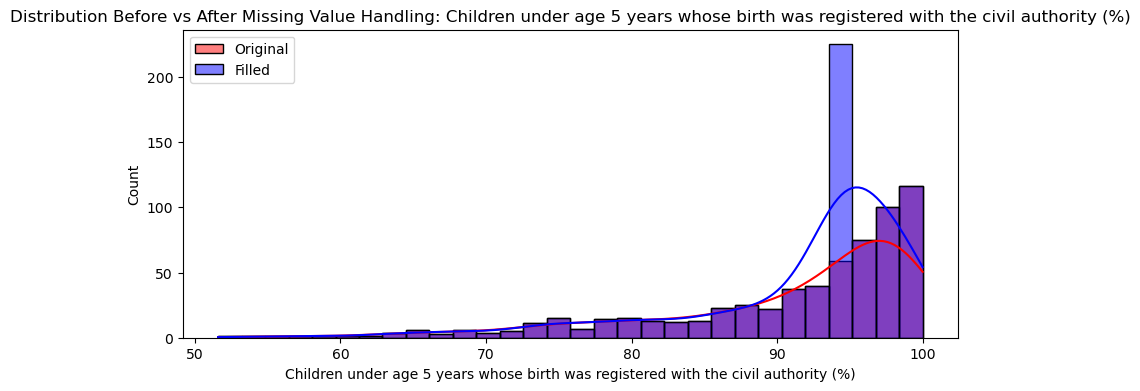

<Figure size 1000x400 with 0 Axes>

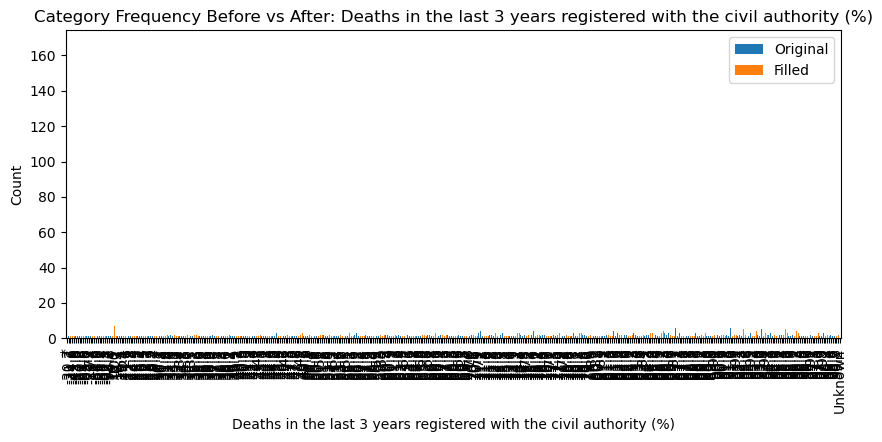

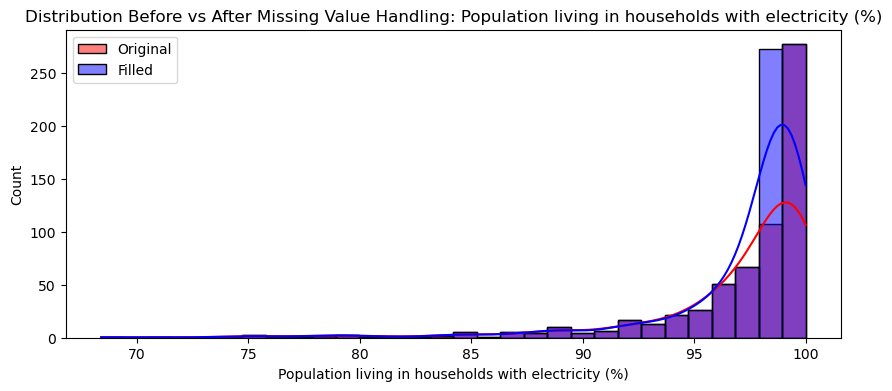

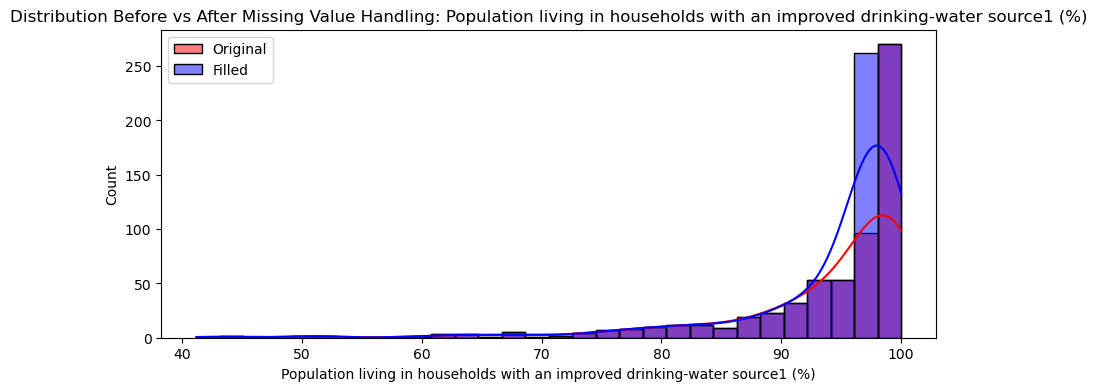

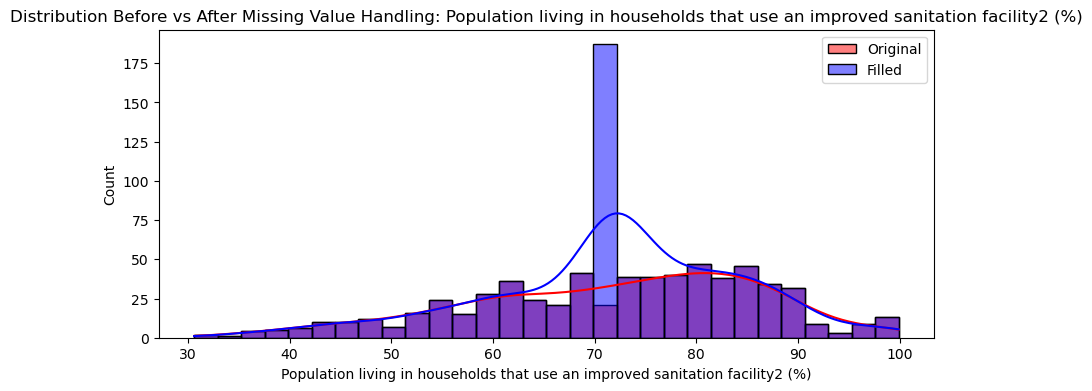

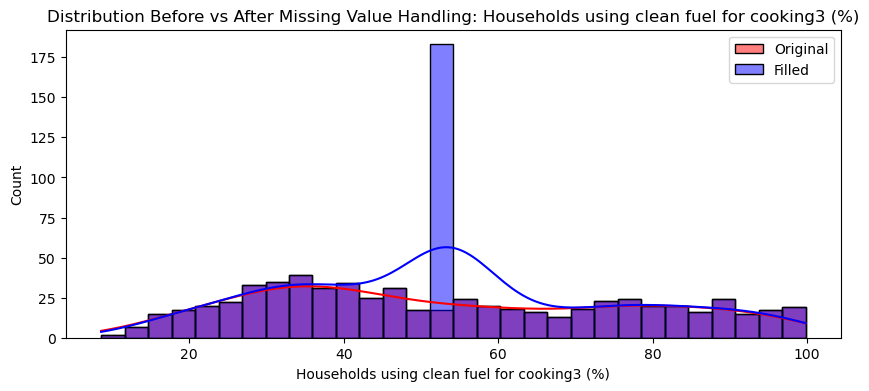

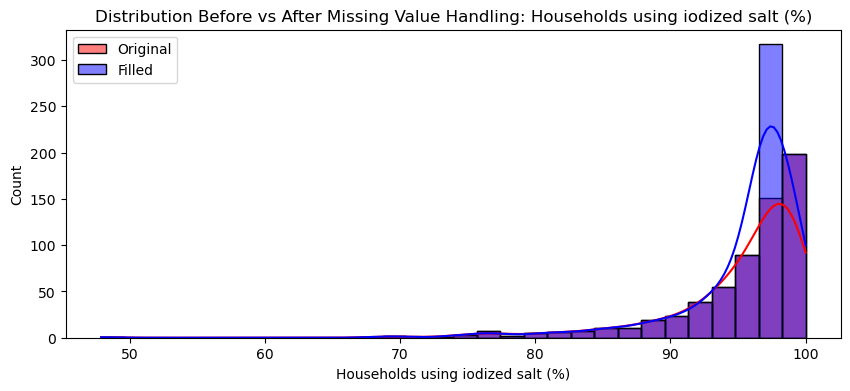

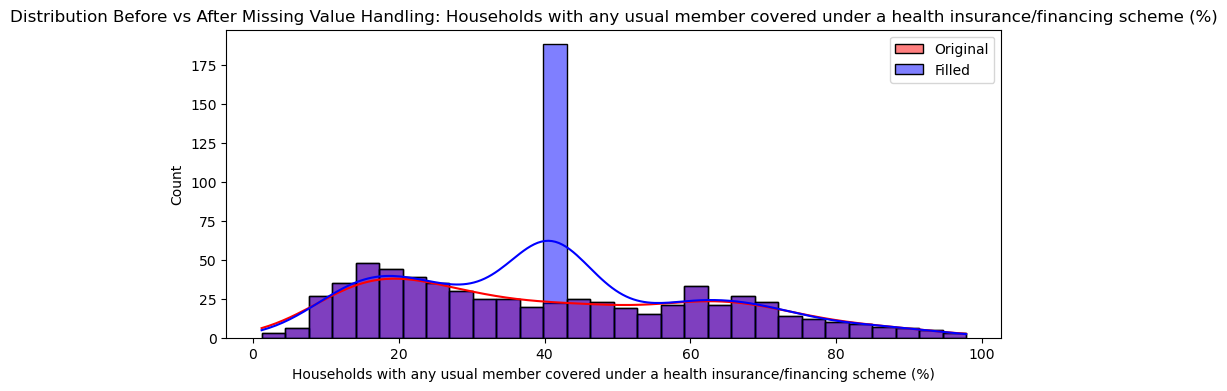

<Figure size 1000x400 with 0 Axes>

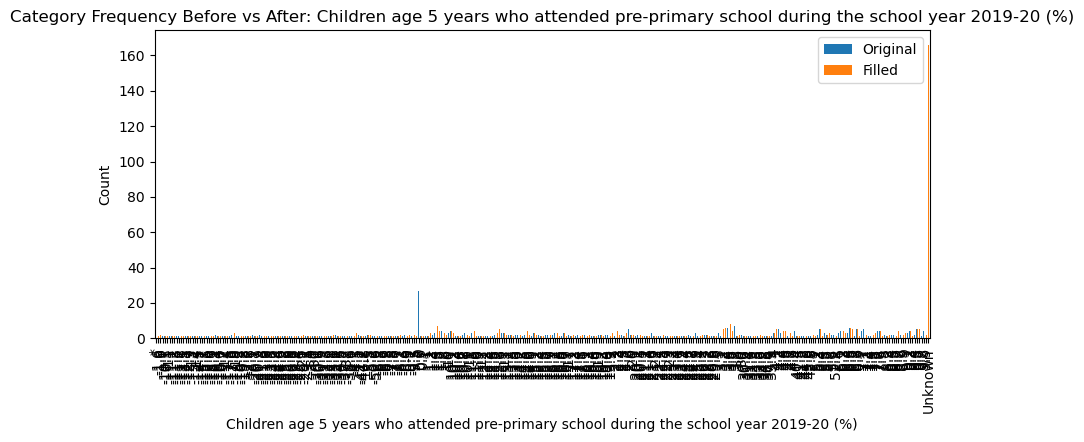

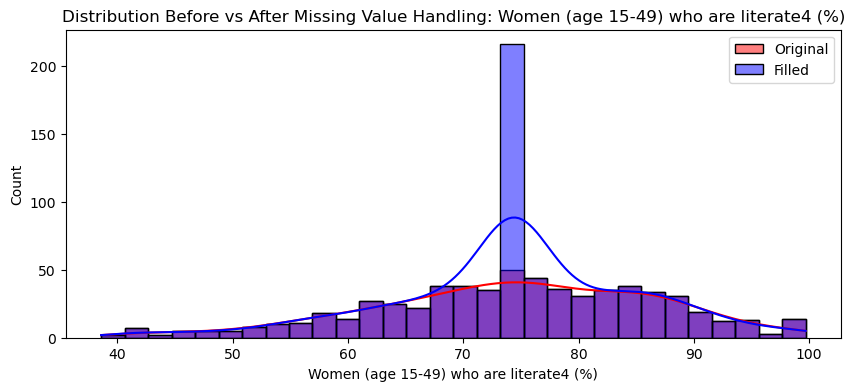

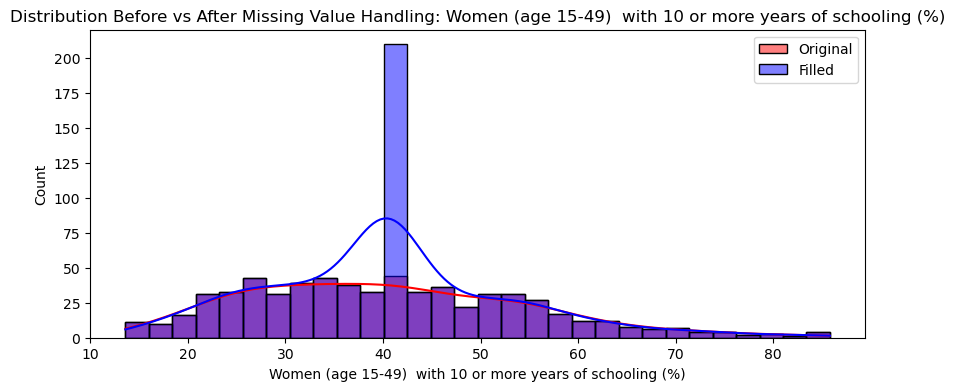

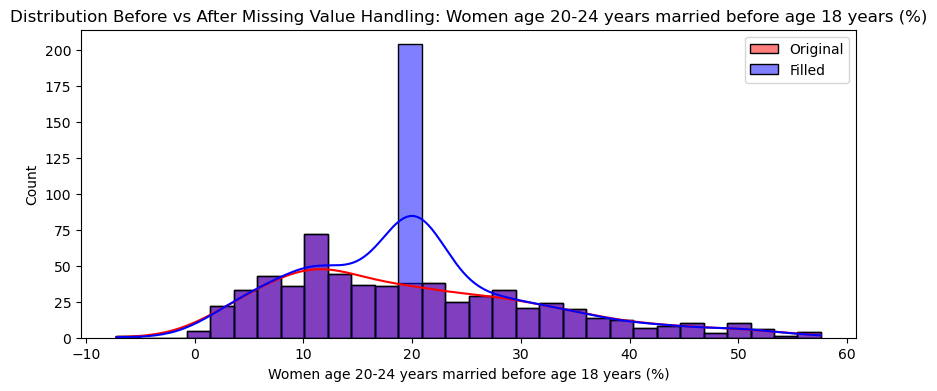

<Figure size 1000x400 with 0 Axes>

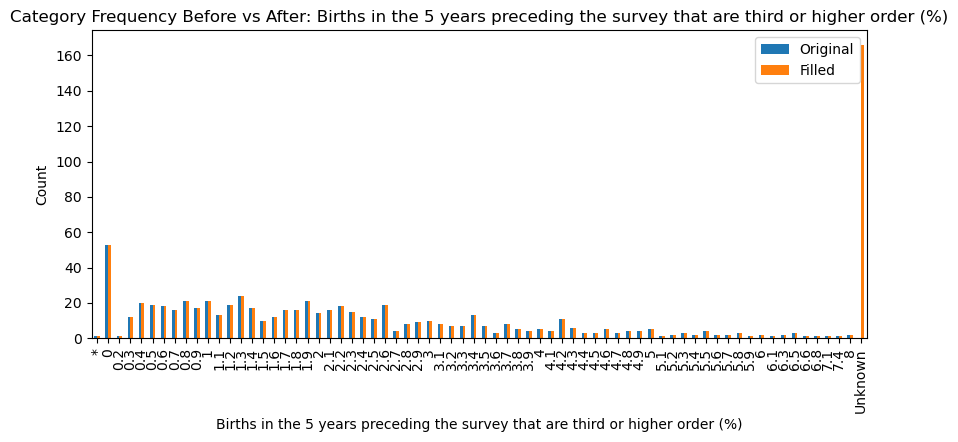

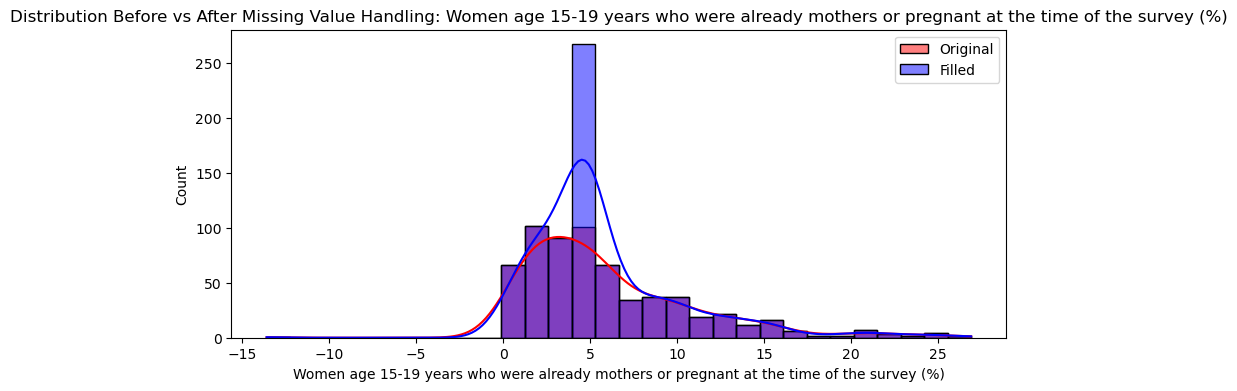

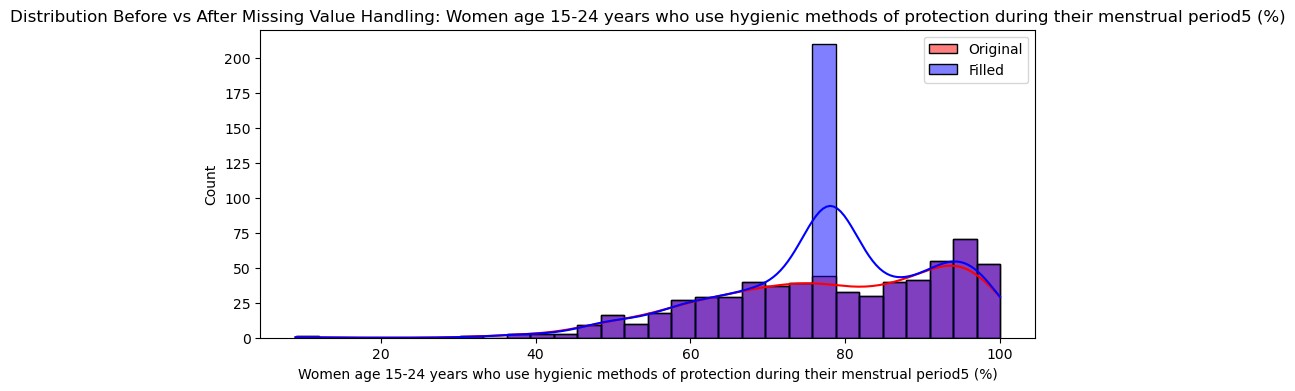

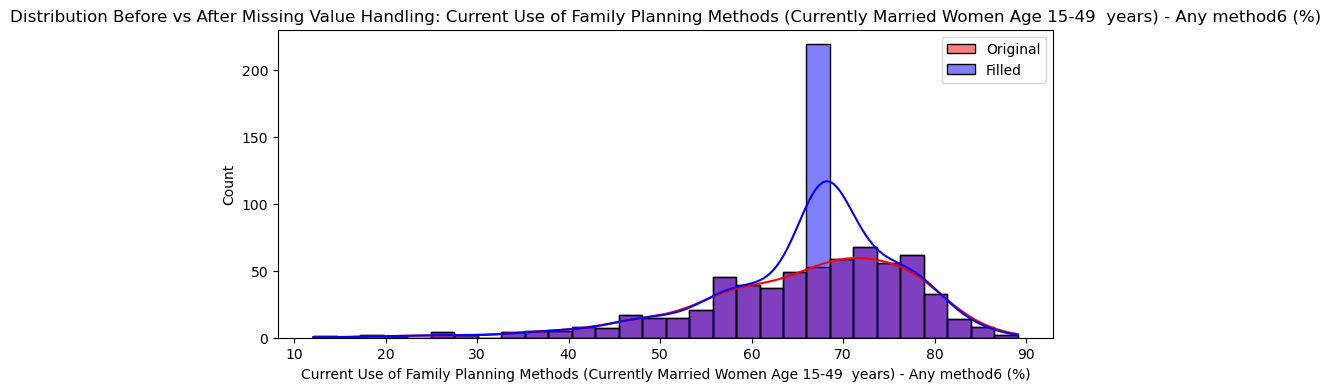

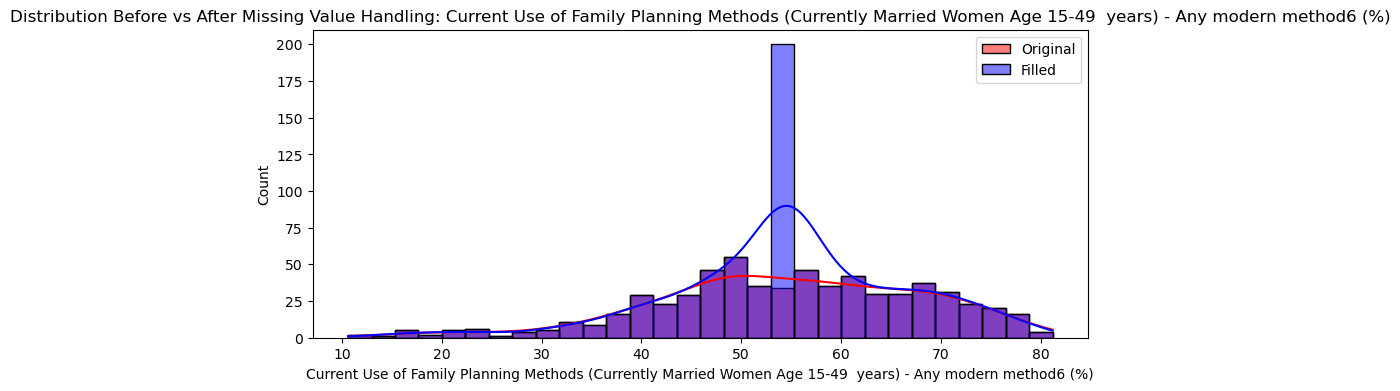

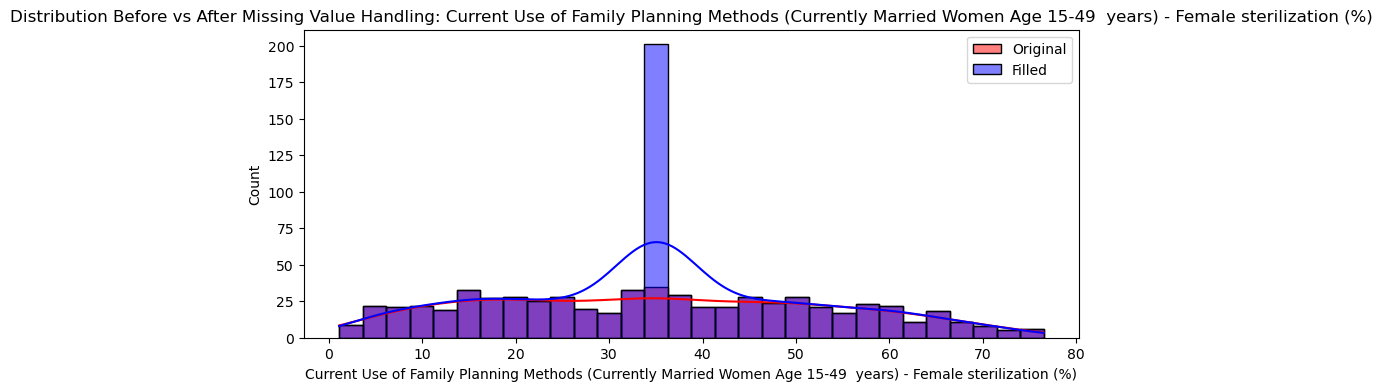

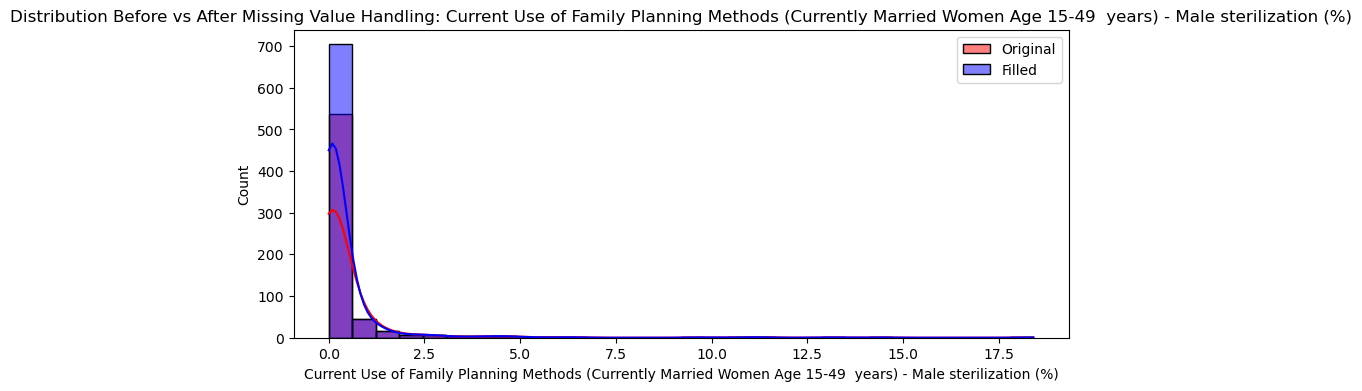

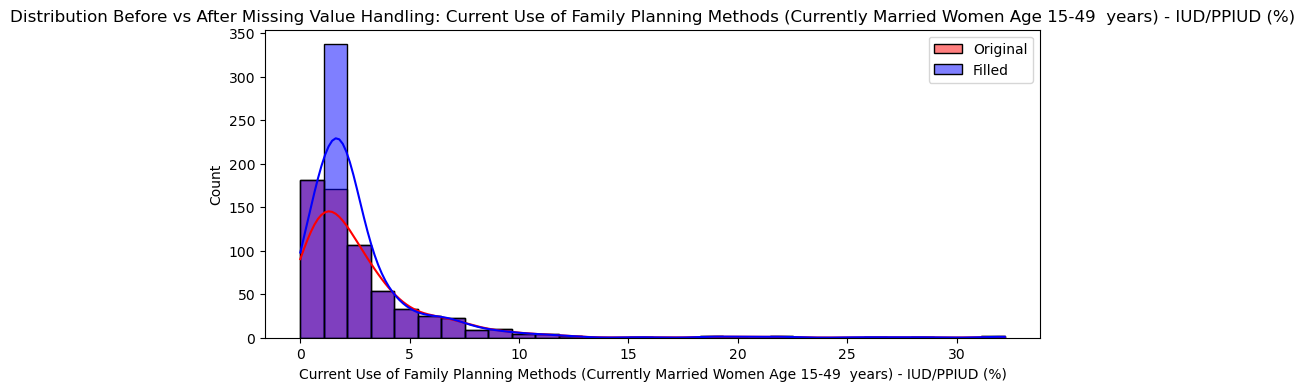

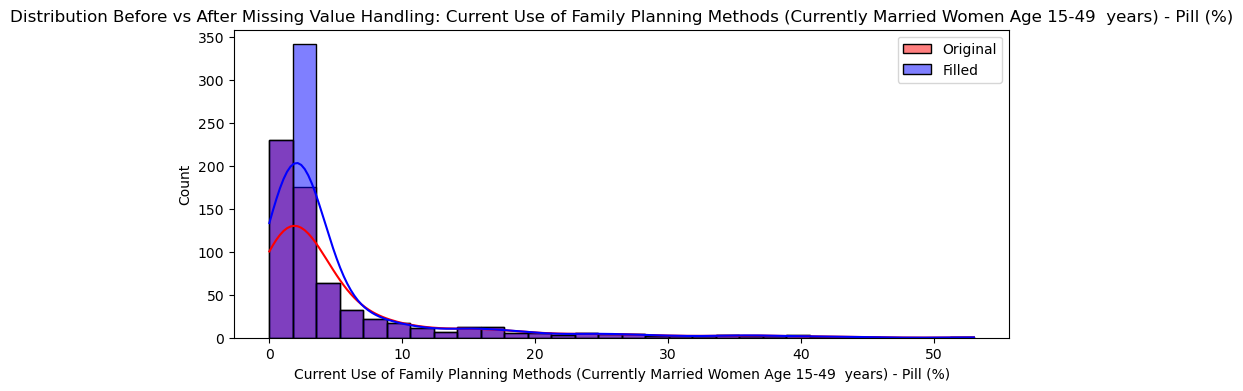

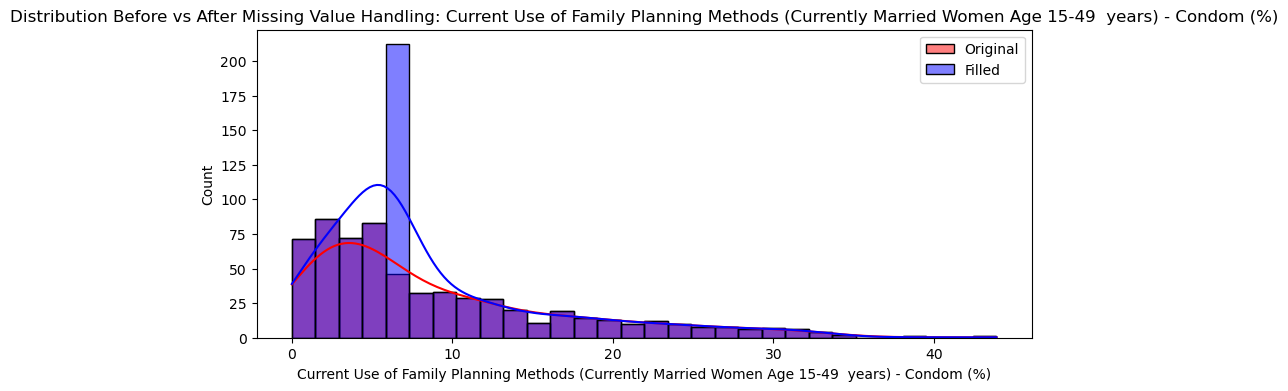

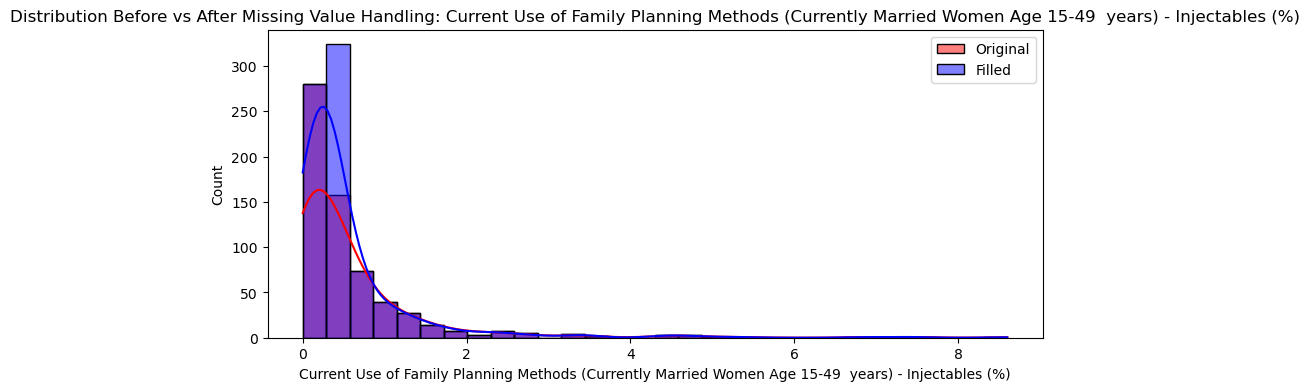

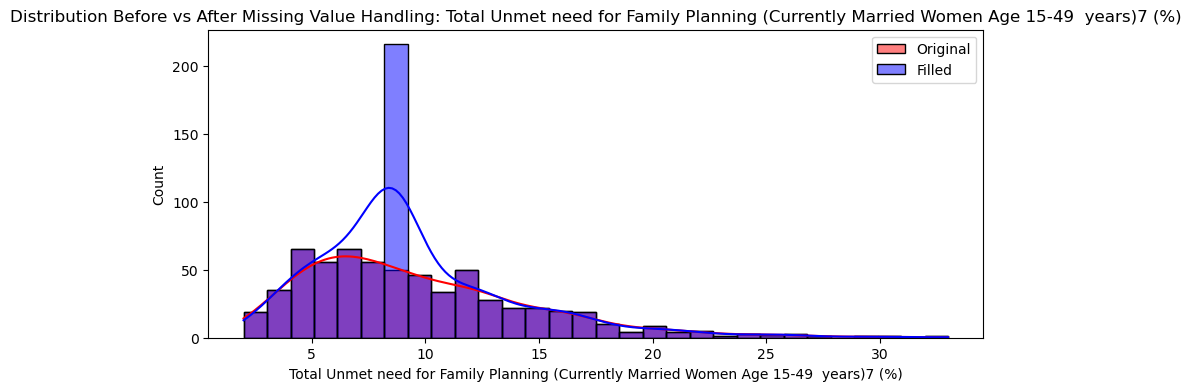

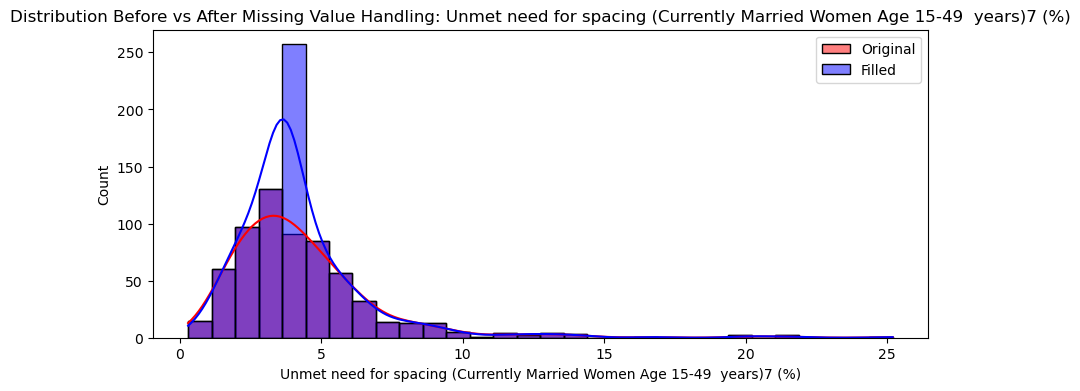

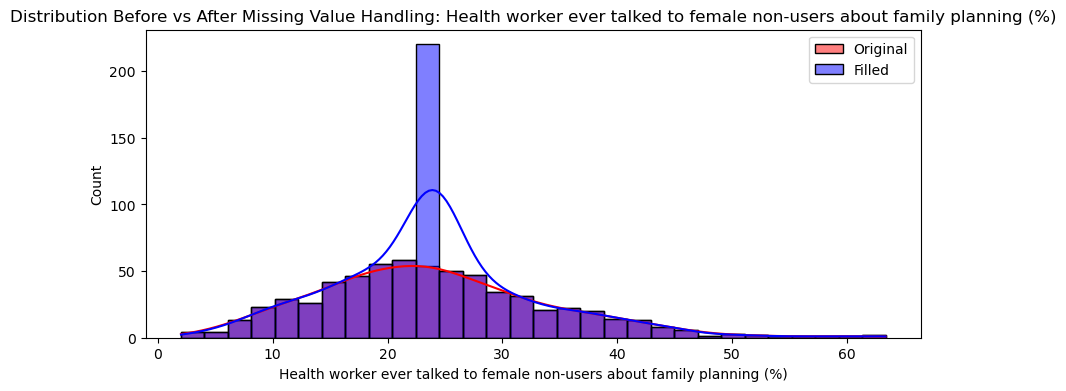

<Figure size 1000x400 with 0 Axes>

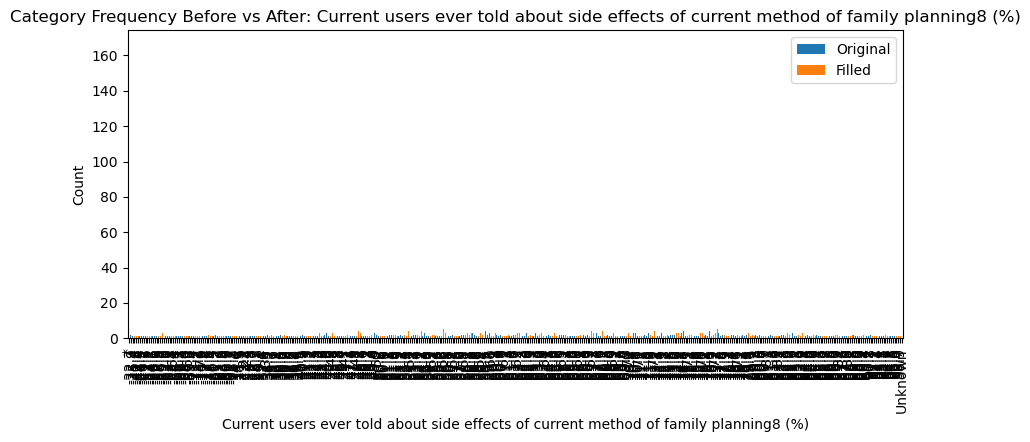

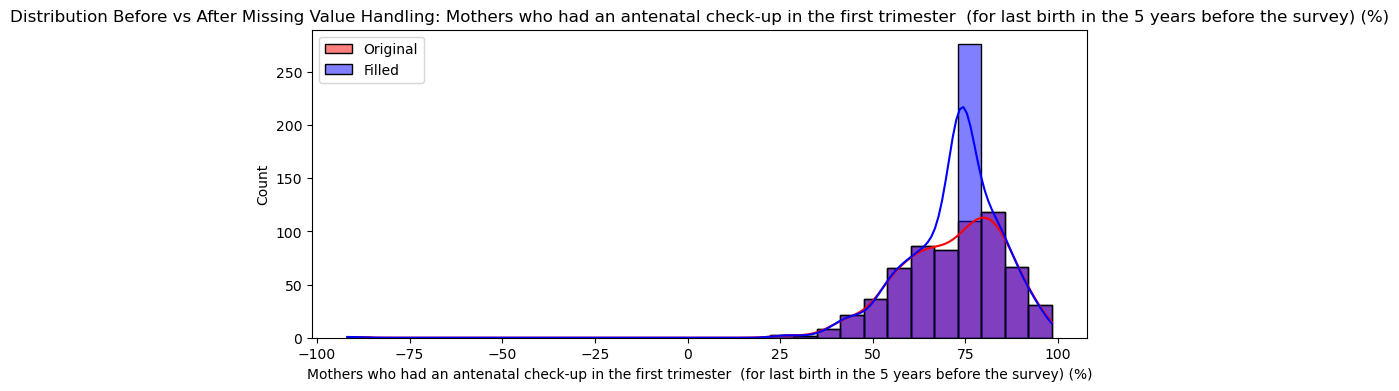

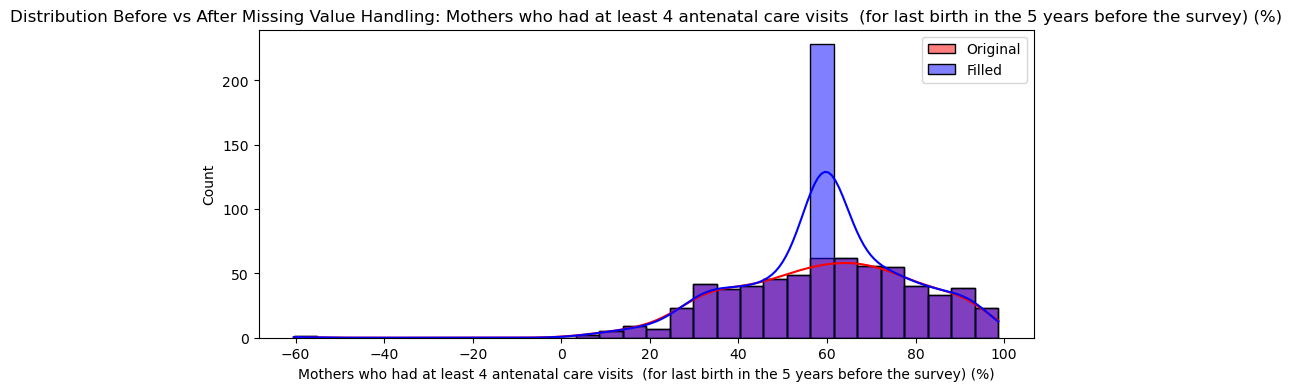

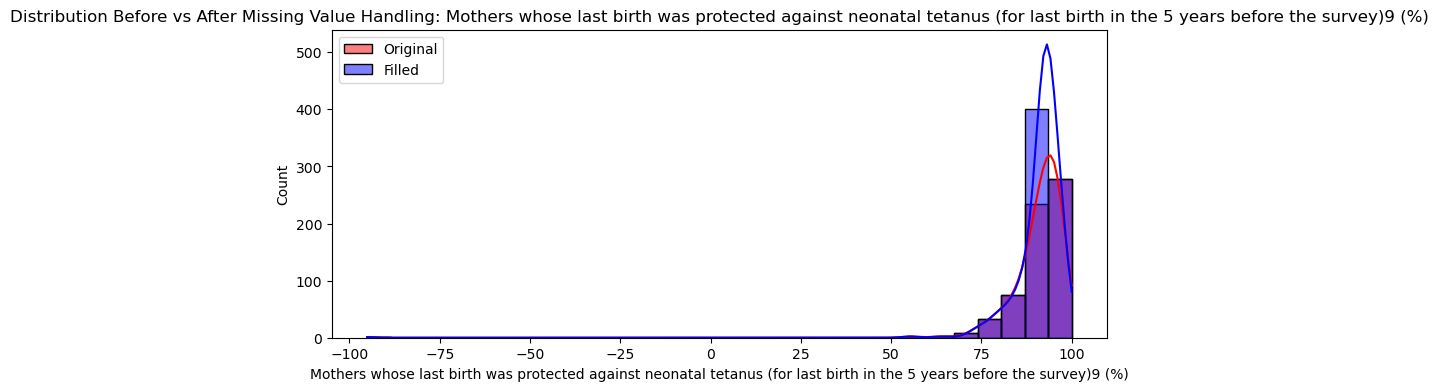

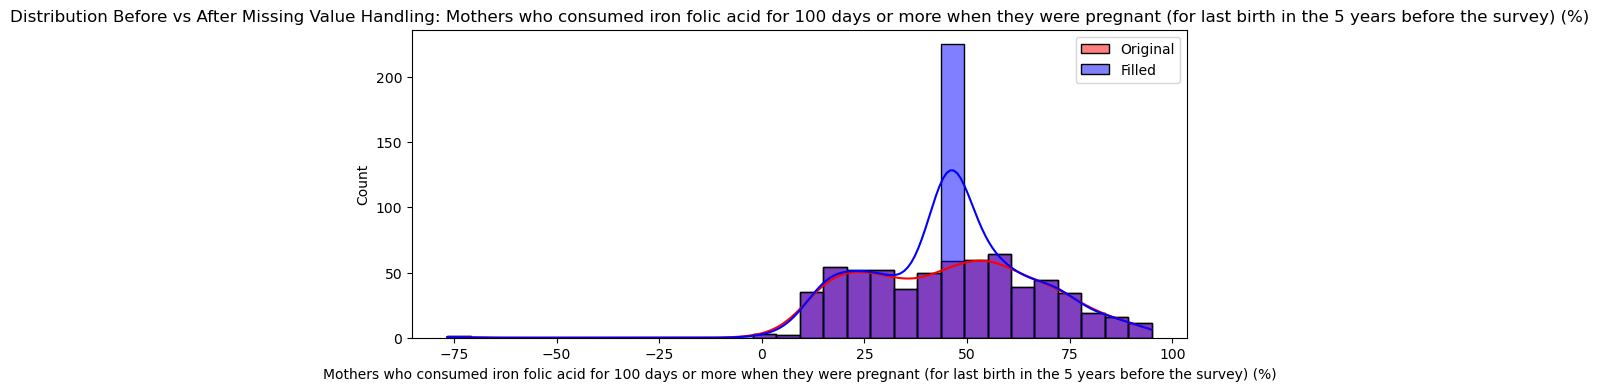

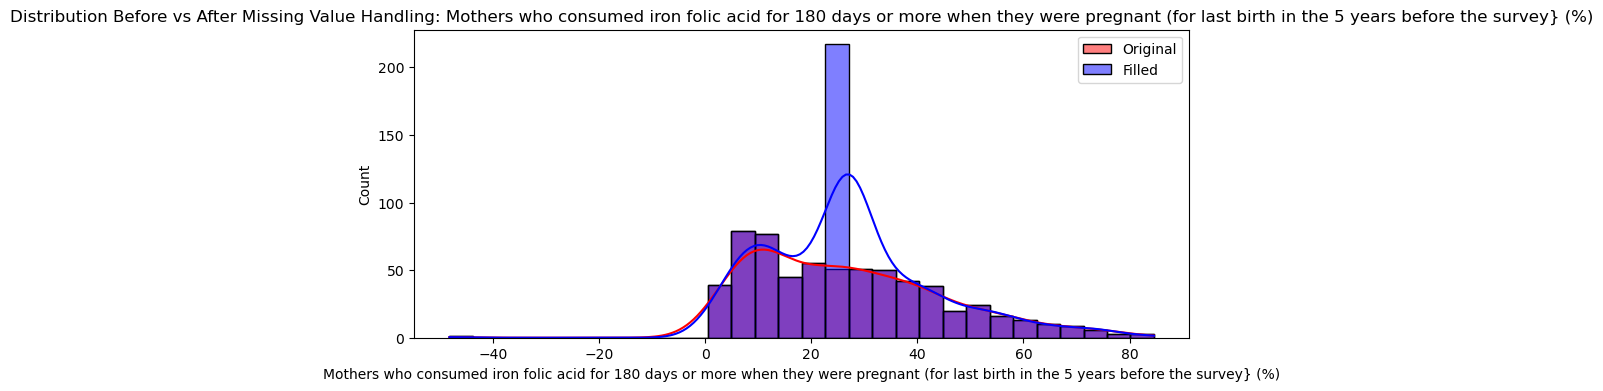

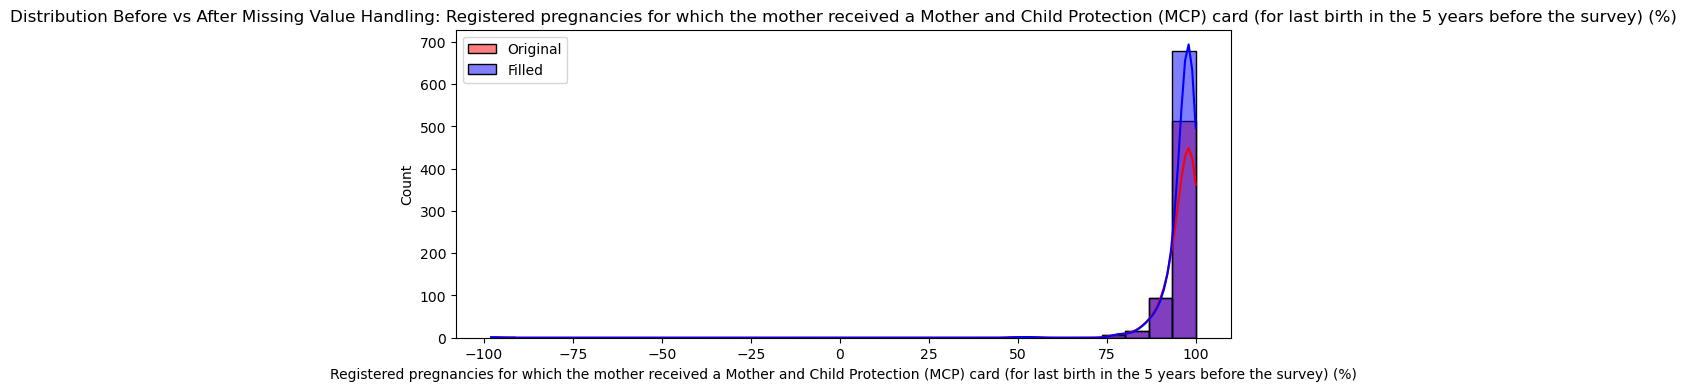

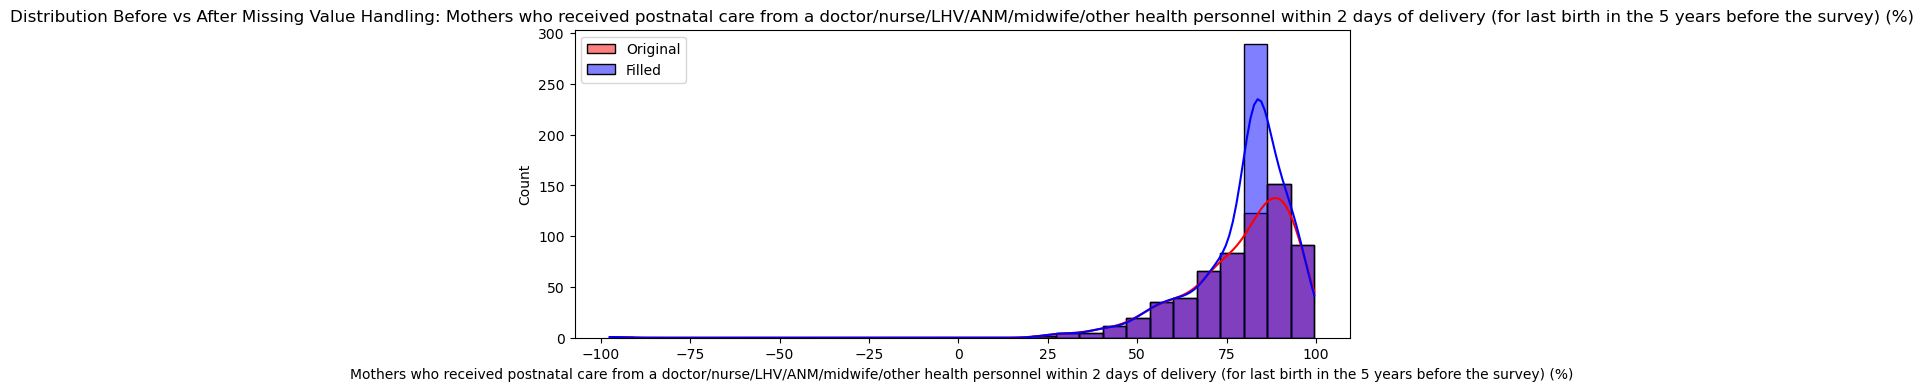

<Figure size 1000x400 with 0 Axes>

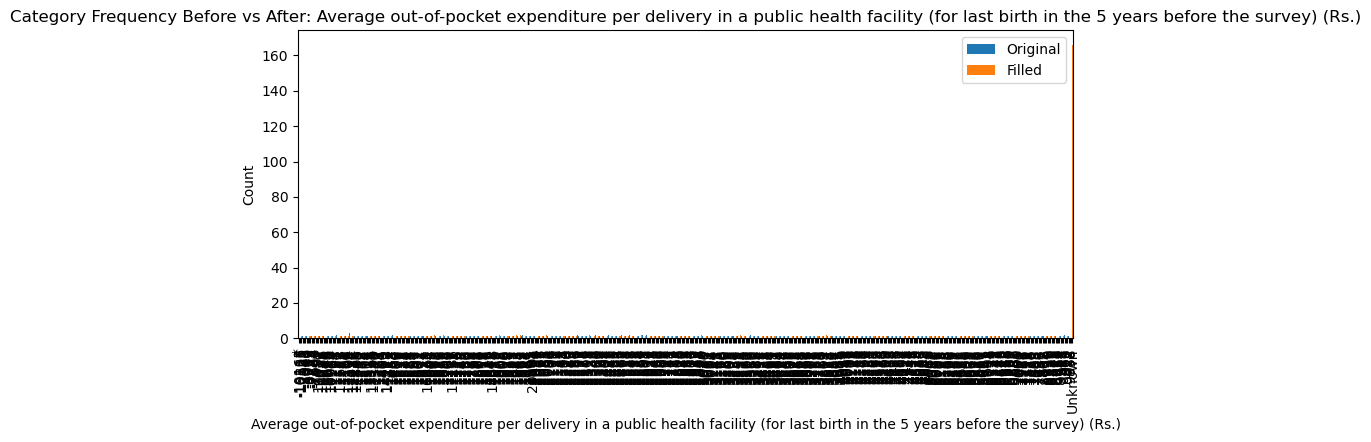

<Figure size 1000x400 with 0 Axes>

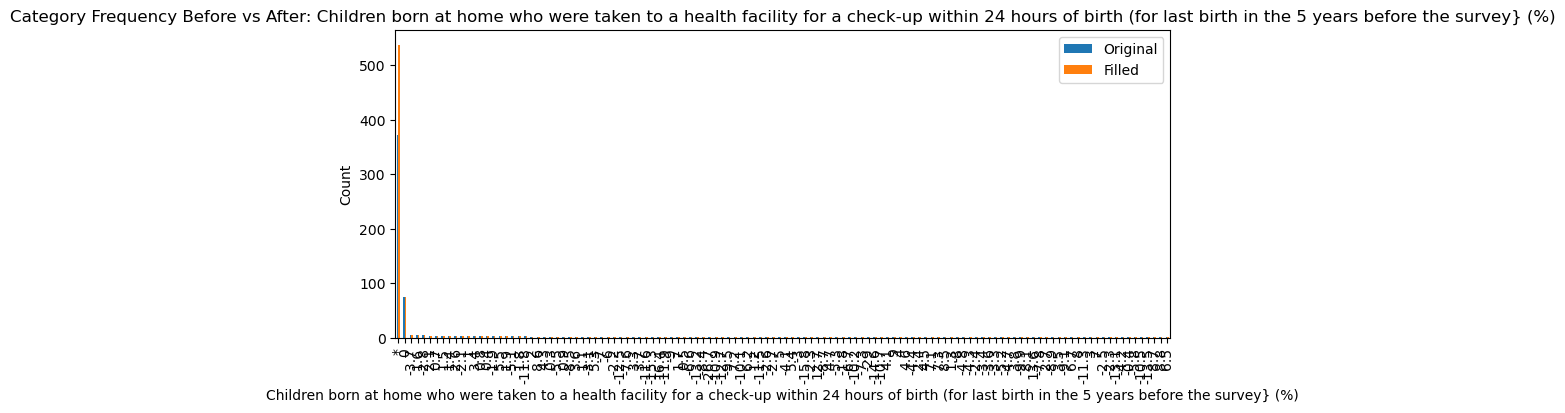

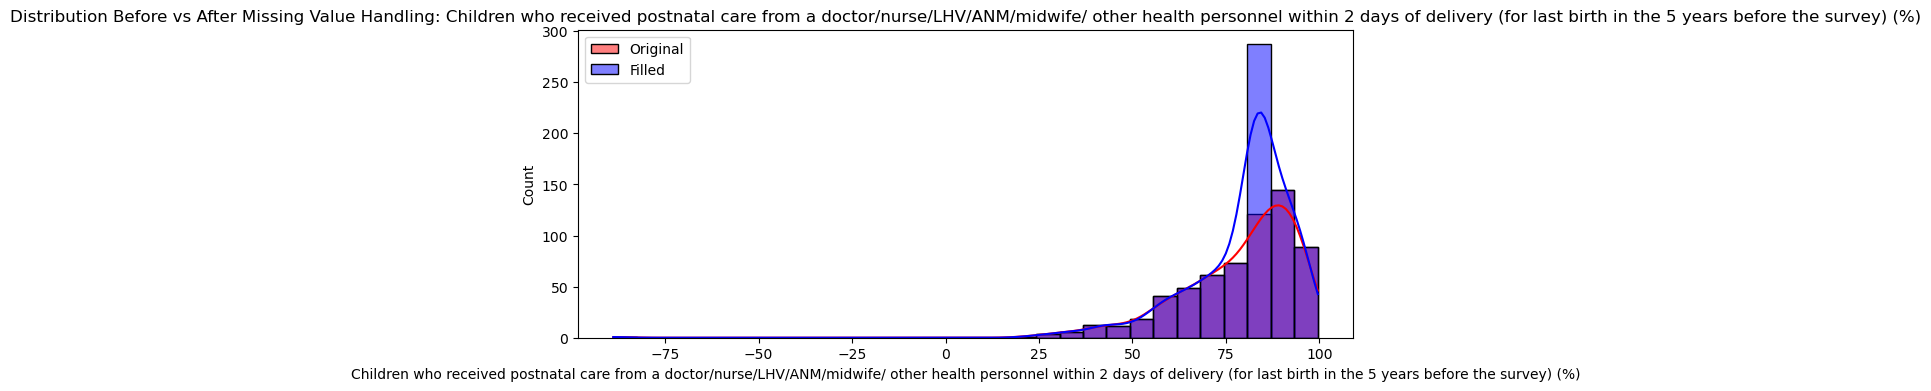

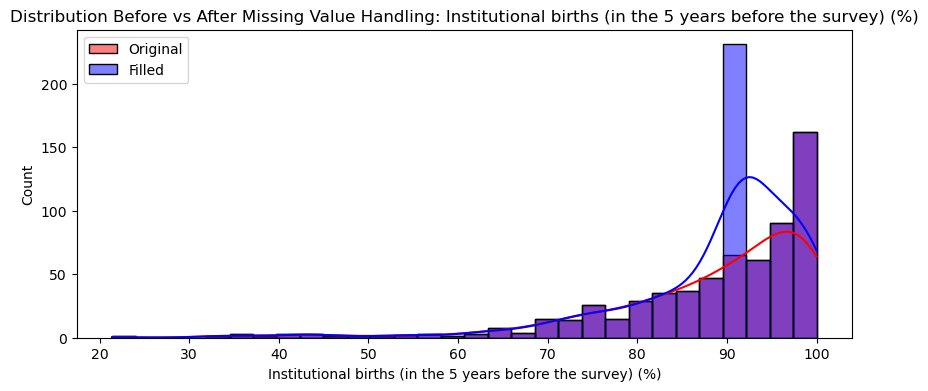

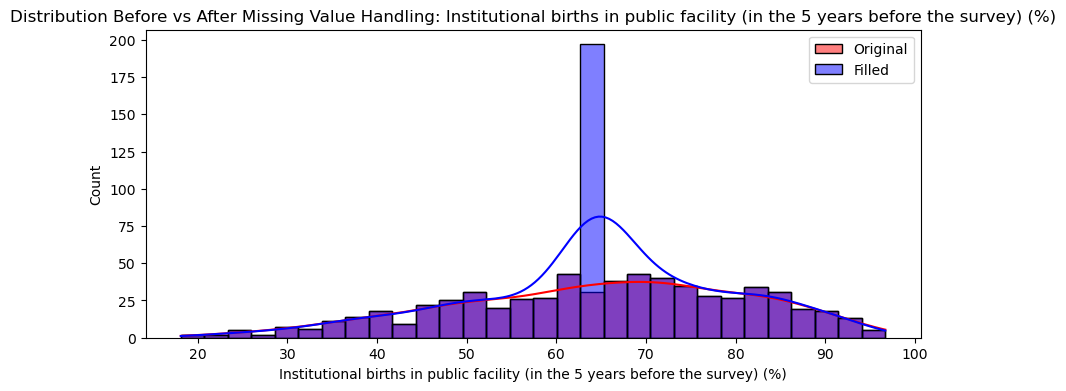

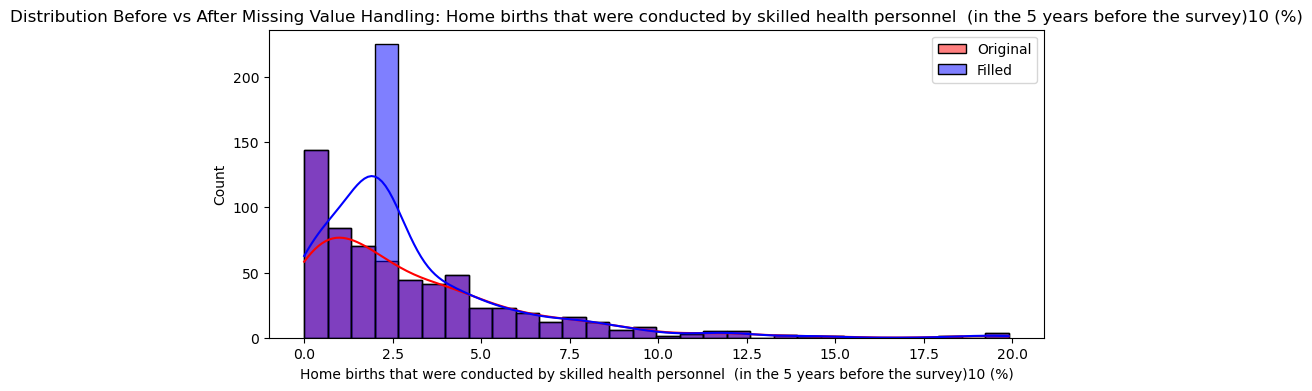

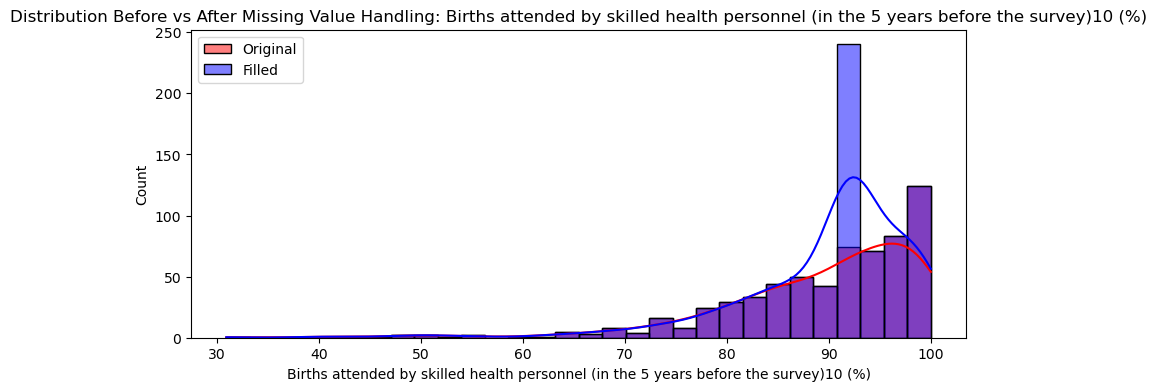

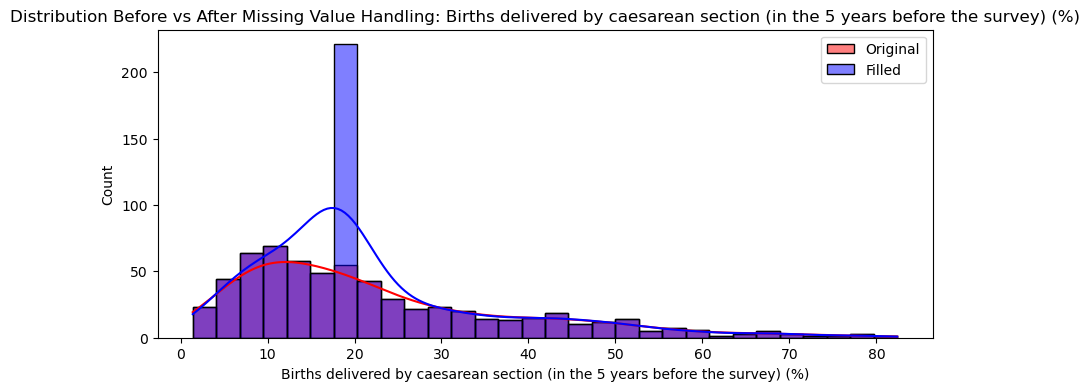

<Figure size 1000x400 with 0 Axes>

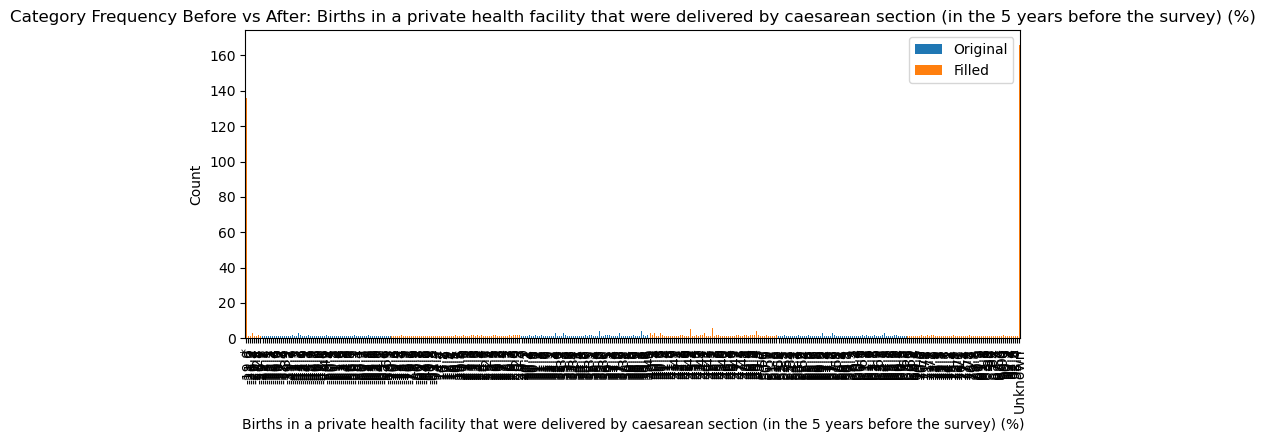

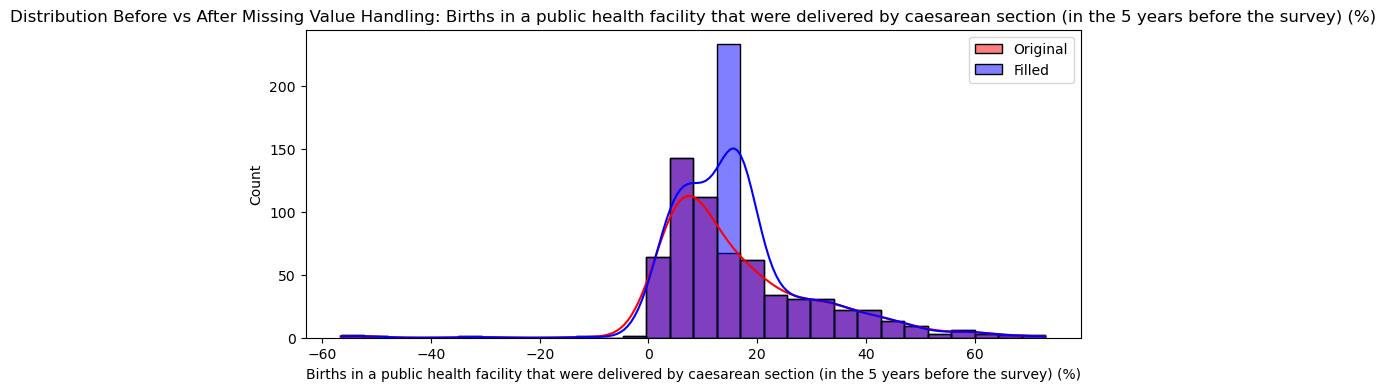

<Figure size 1000x400 with 0 Axes>

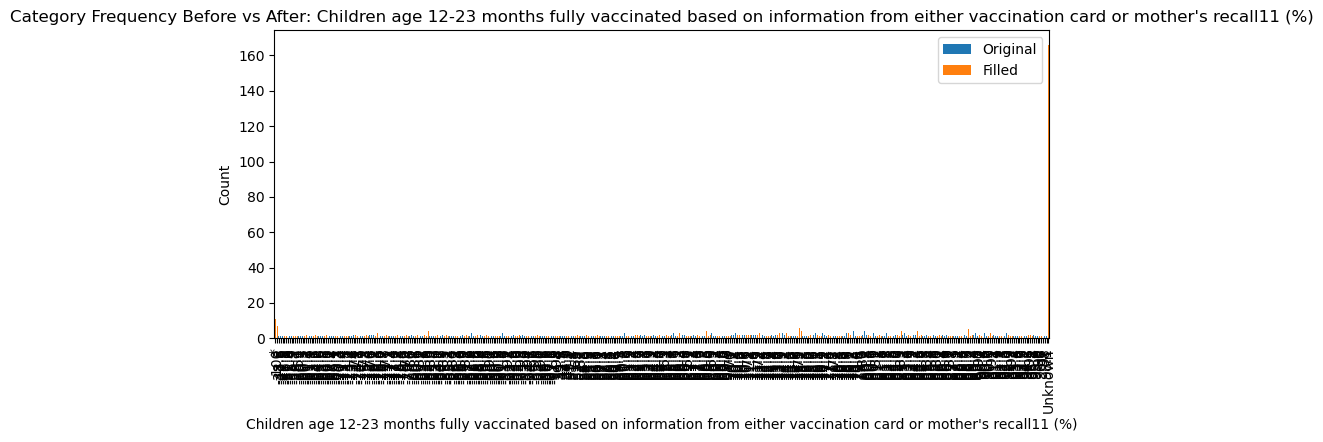

<Figure size 1000x400 with 0 Axes>

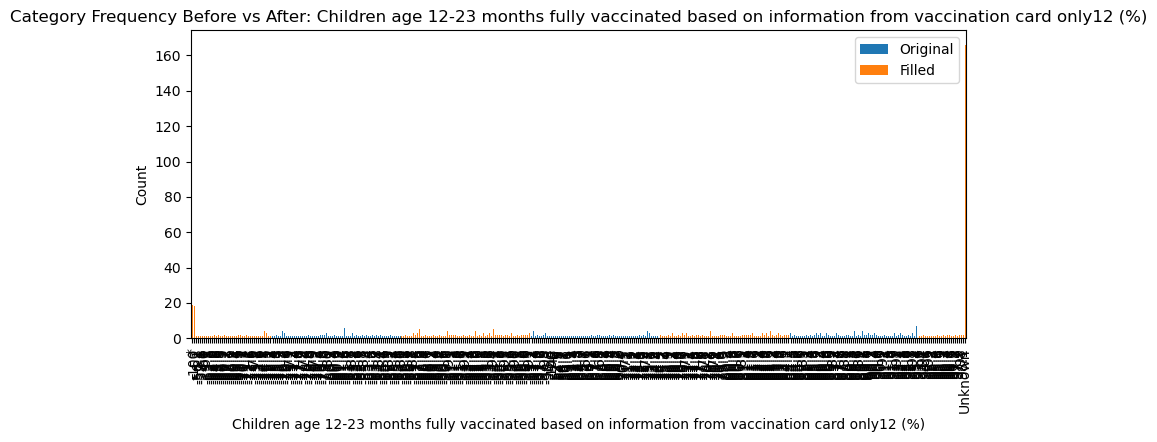

<Figure size 1000x400 with 0 Axes>

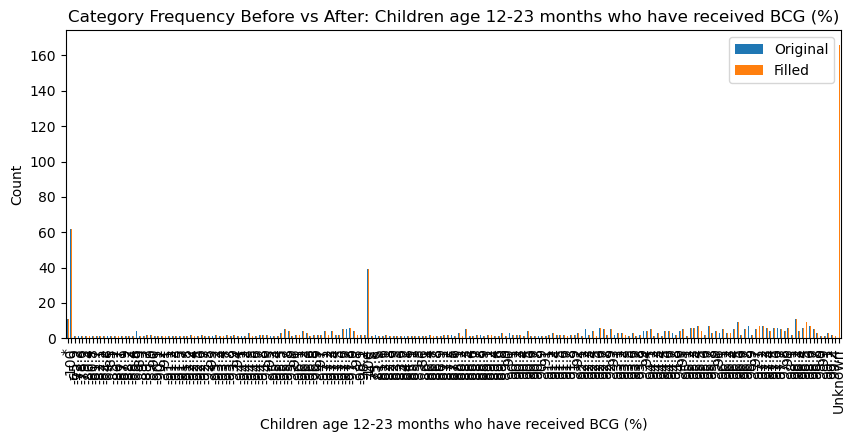

<Figure size 1000x400 with 0 Axes>

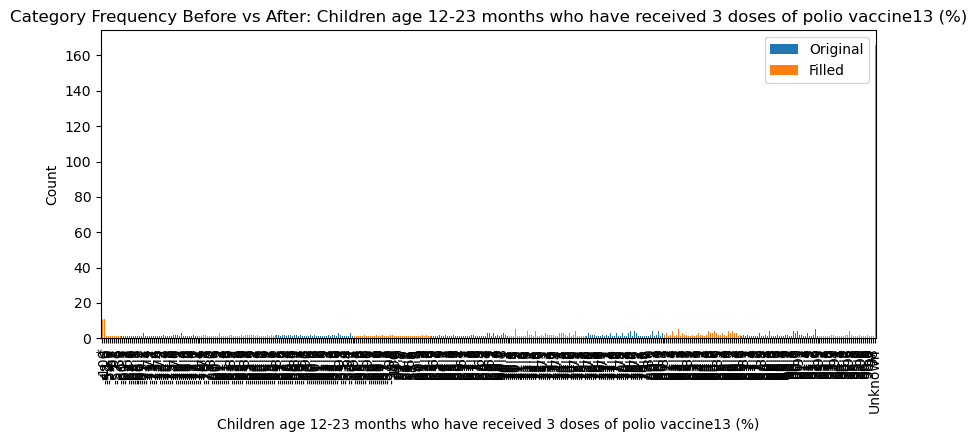

<Figure size 1000x400 with 0 Axes>

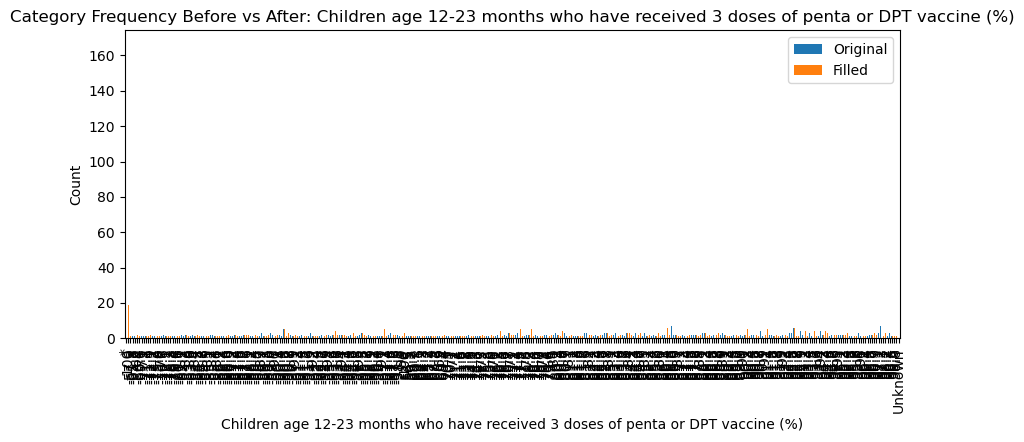

<Figure size 1000x400 with 0 Axes>

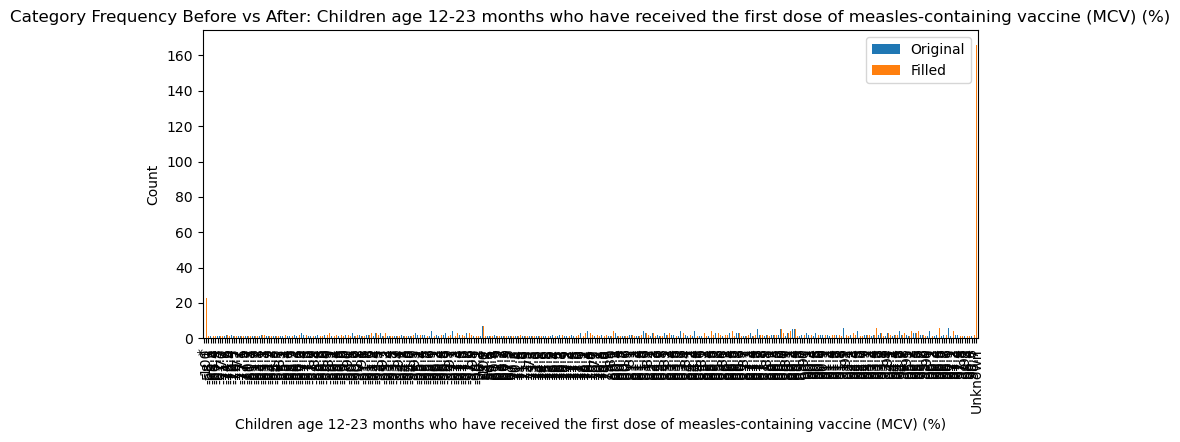

<Figure size 1000x400 with 0 Axes>

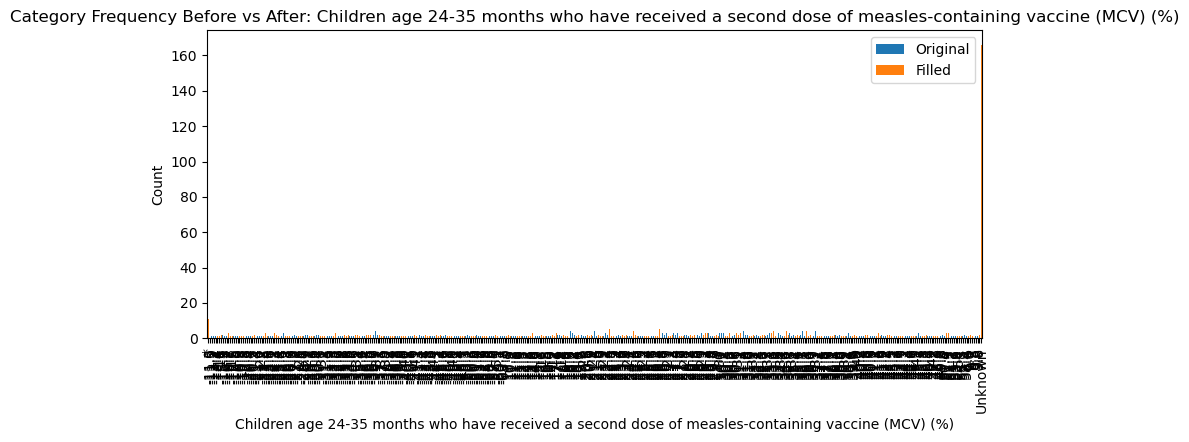

<Figure size 1000x400 with 0 Axes>

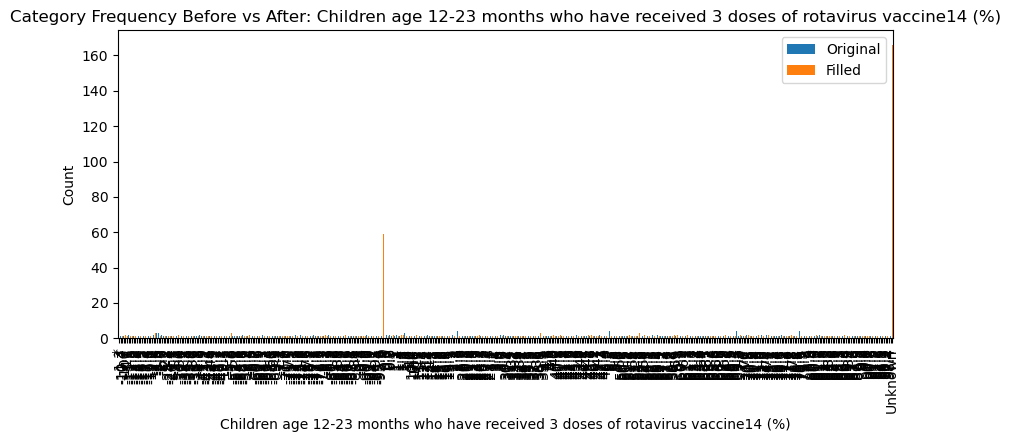

<Figure size 1000x400 with 0 Axes>

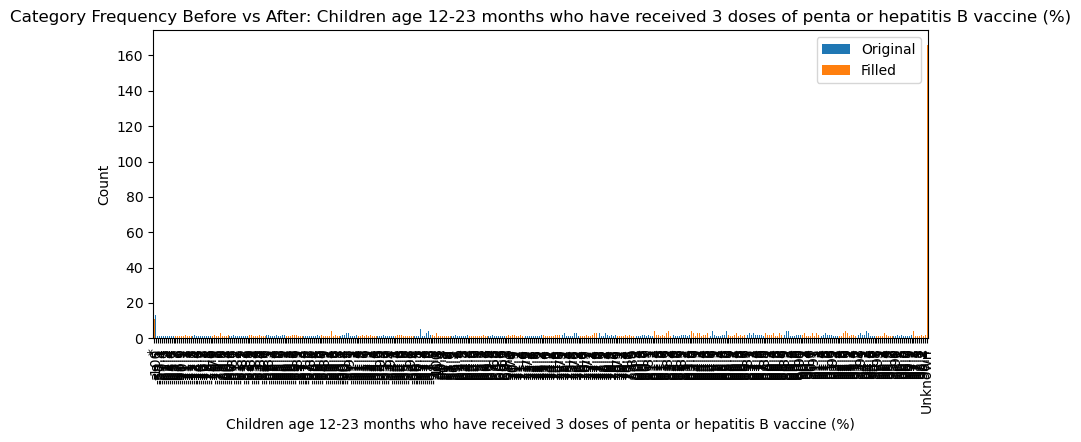

<Figure size 1000x400 with 0 Axes>

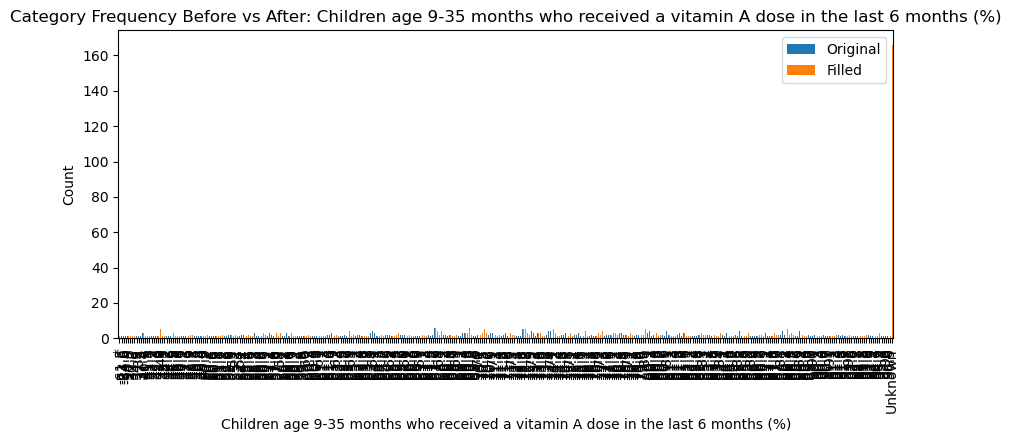

<Figure size 1000x400 with 0 Axes>

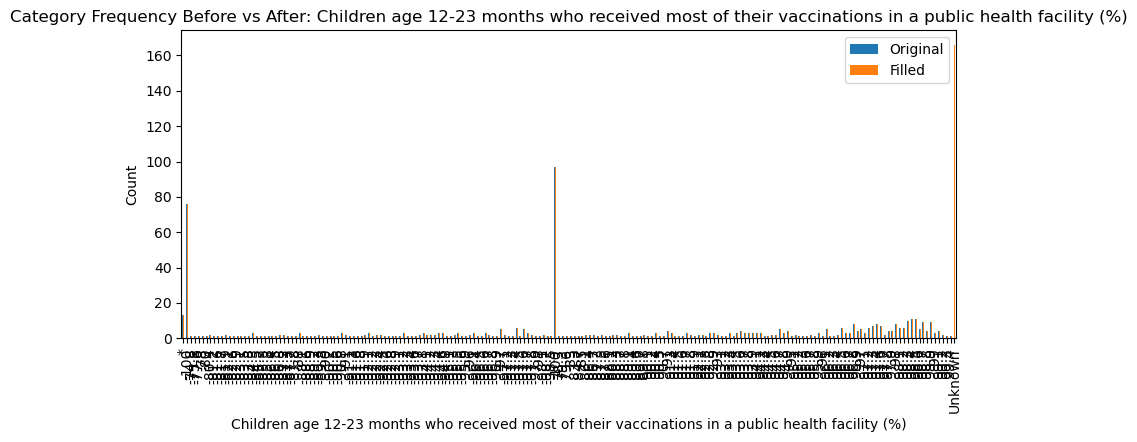

<Figure size 1000x400 with 0 Axes>

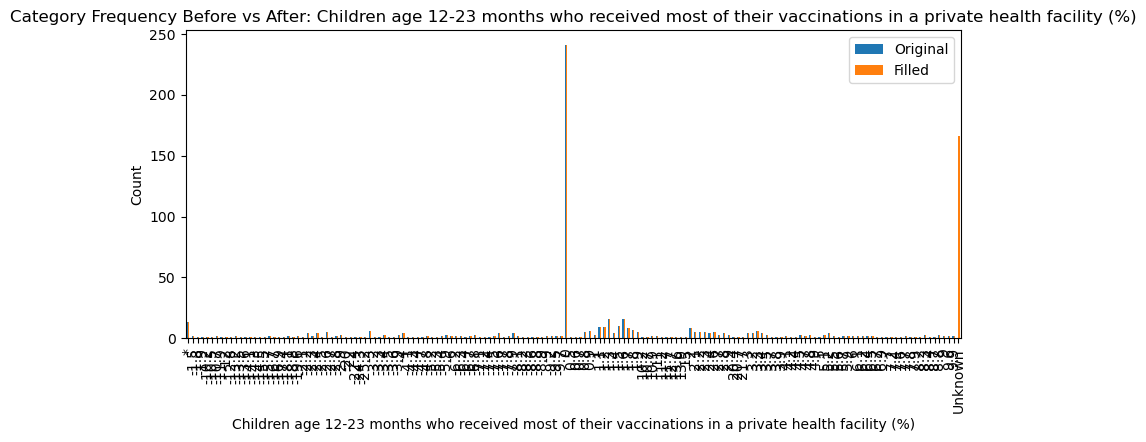

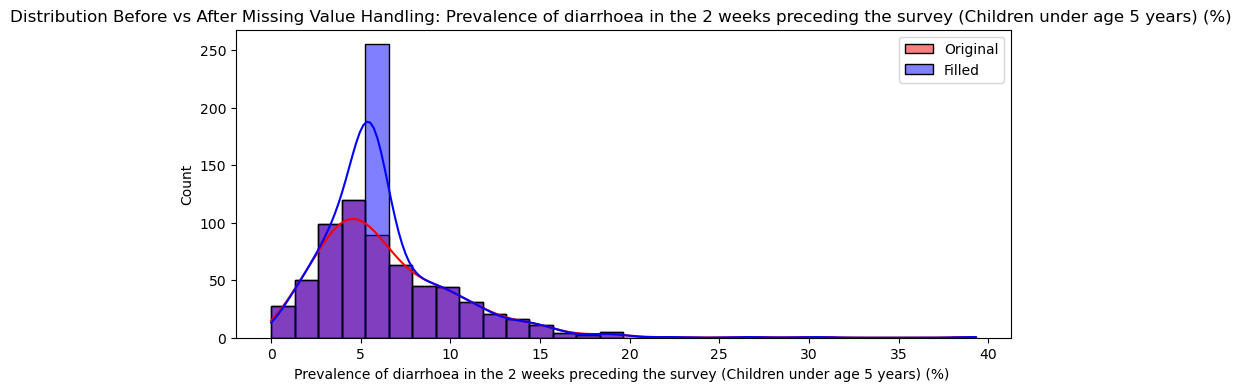

<Figure size 1000x400 with 0 Axes>

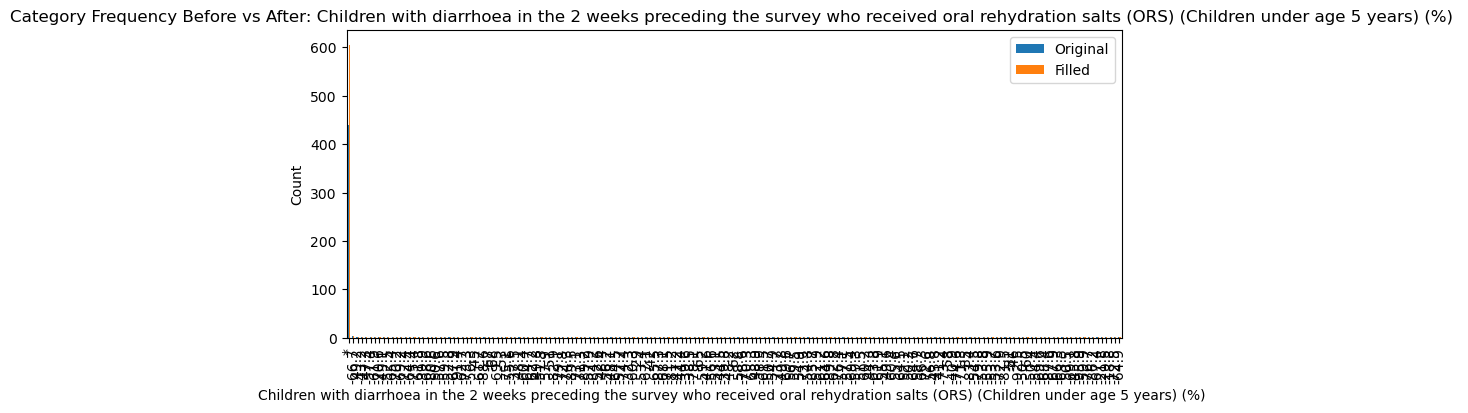

<Figure size 1000x400 with 0 Axes>

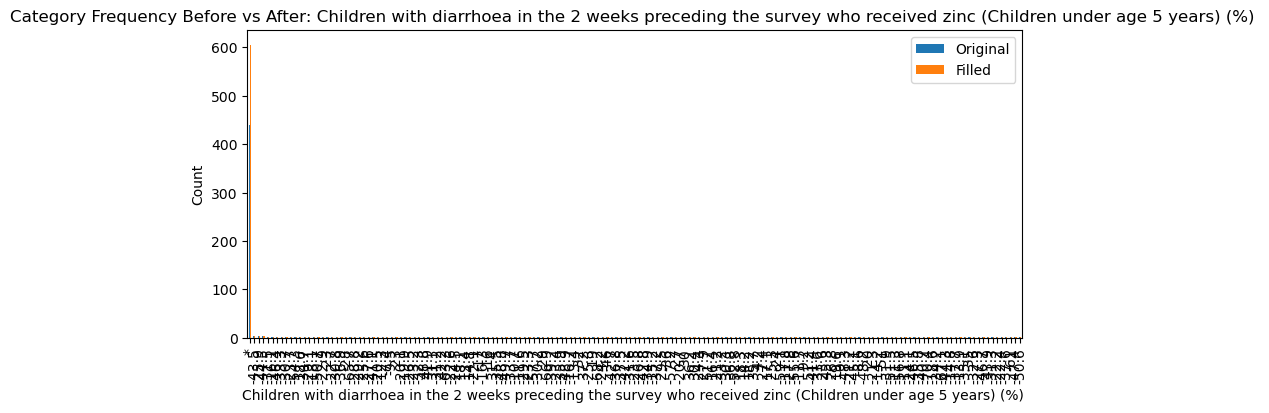

<Figure size 1000x400 with 0 Axes>

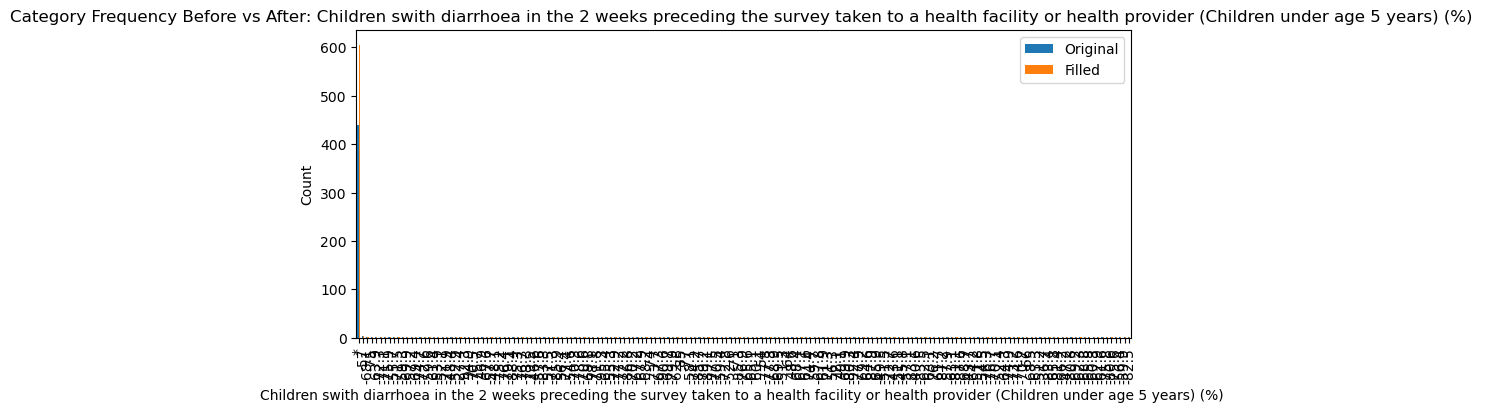

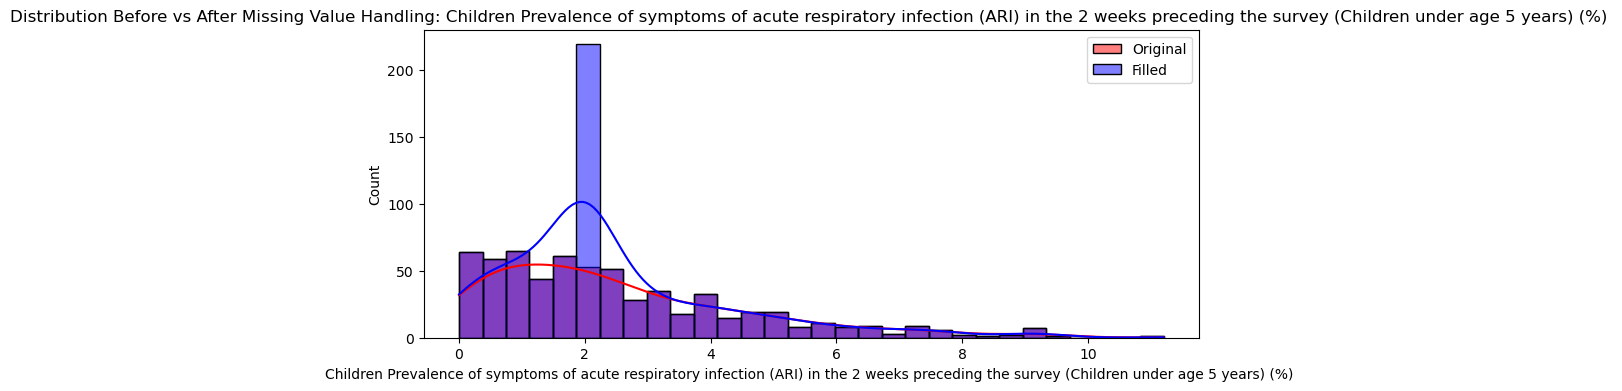

<Figure size 1000x400 with 0 Axes>

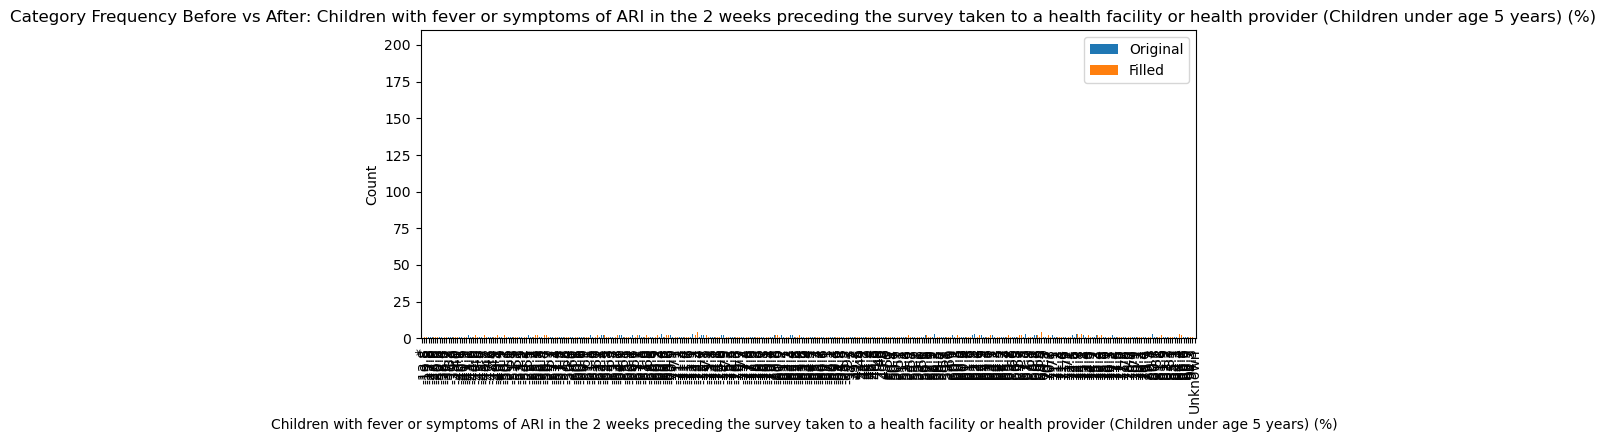

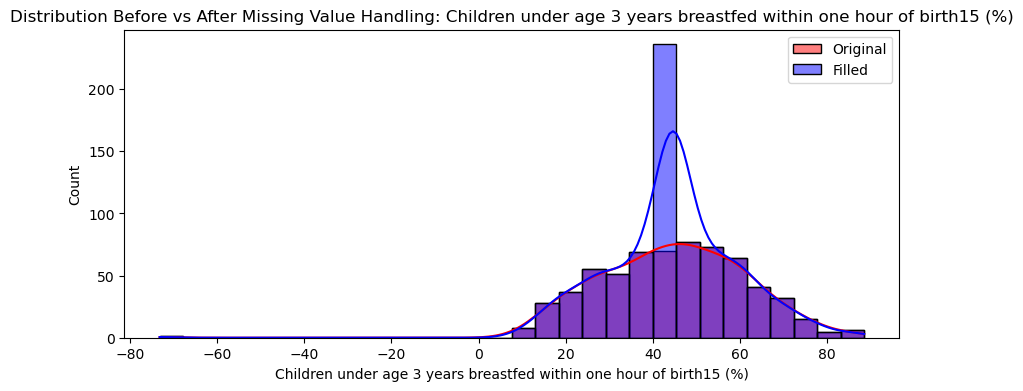

<Figure size 1000x400 with 0 Axes>

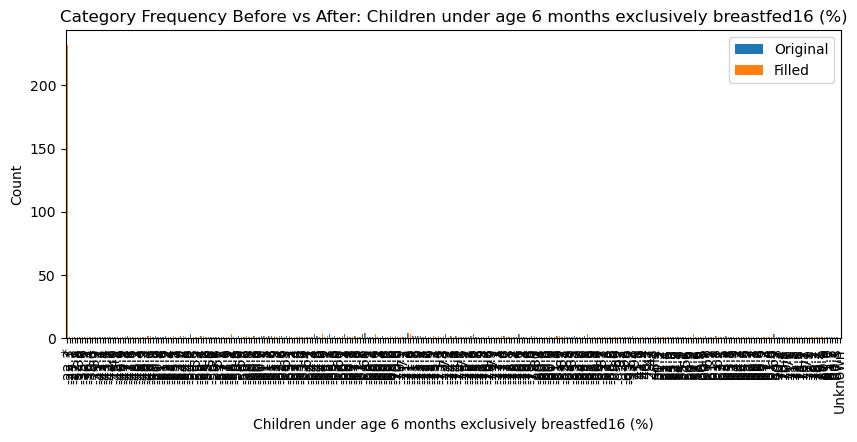

<Figure size 1000x400 with 0 Axes>

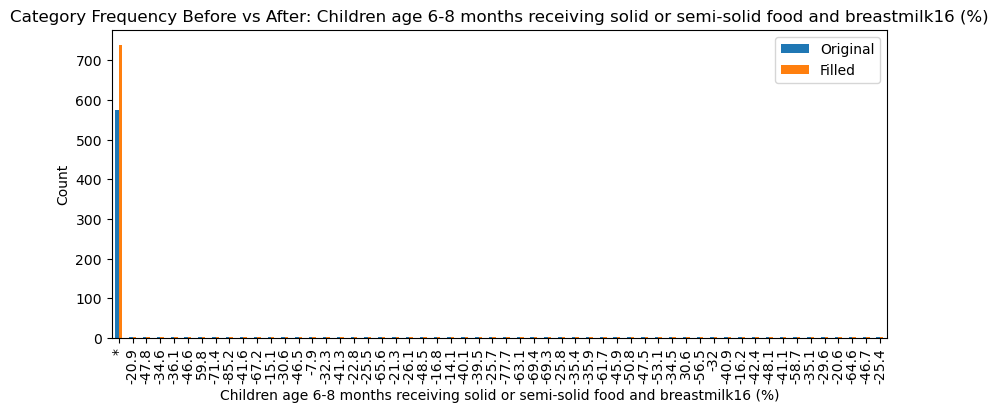

<Figure size 1000x400 with 0 Axes>

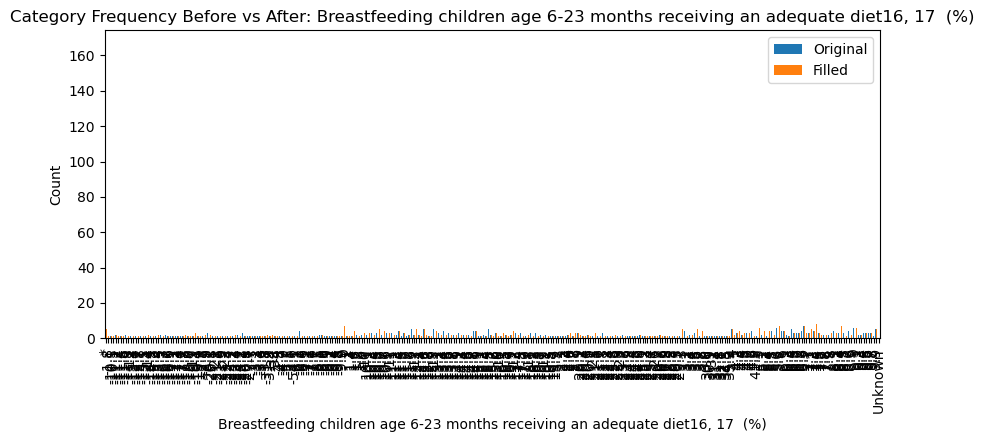

<Figure size 1000x400 with 0 Axes>

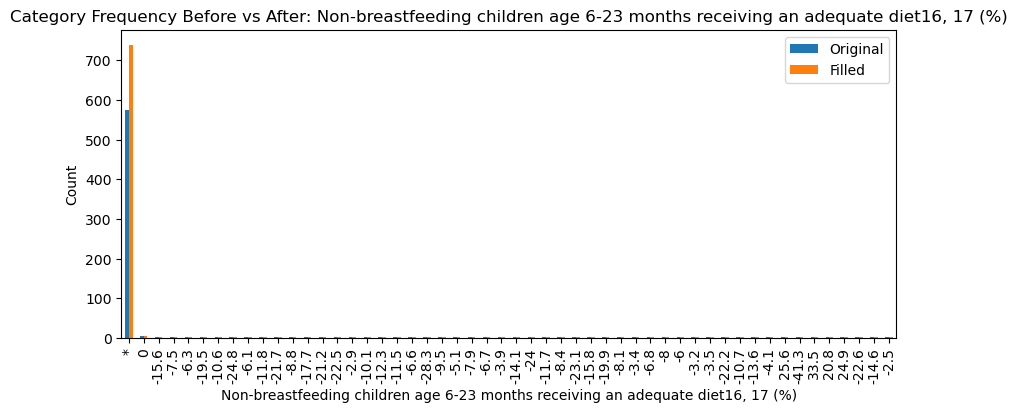

<Figure size 1000x400 with 0 Axes>

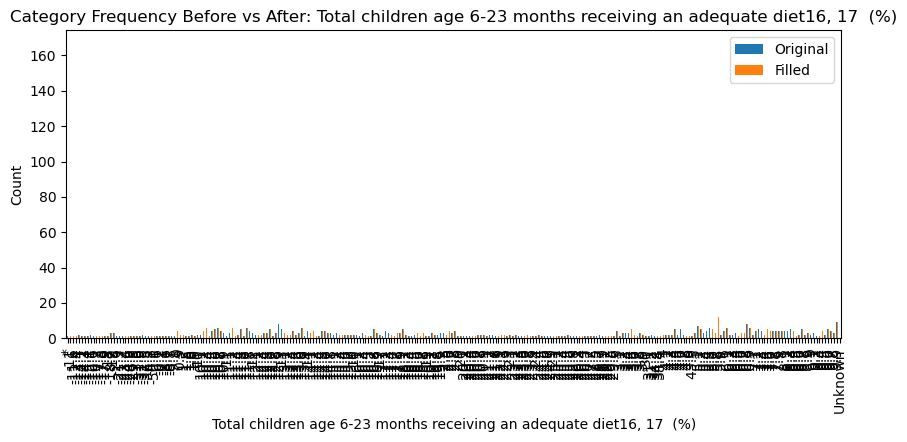

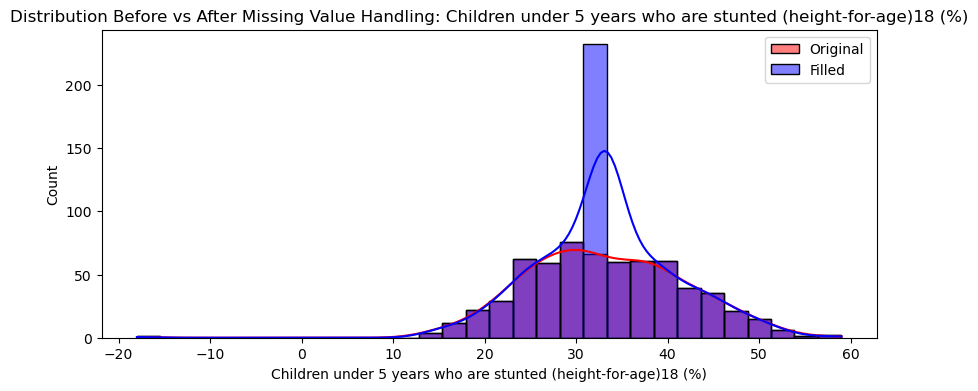

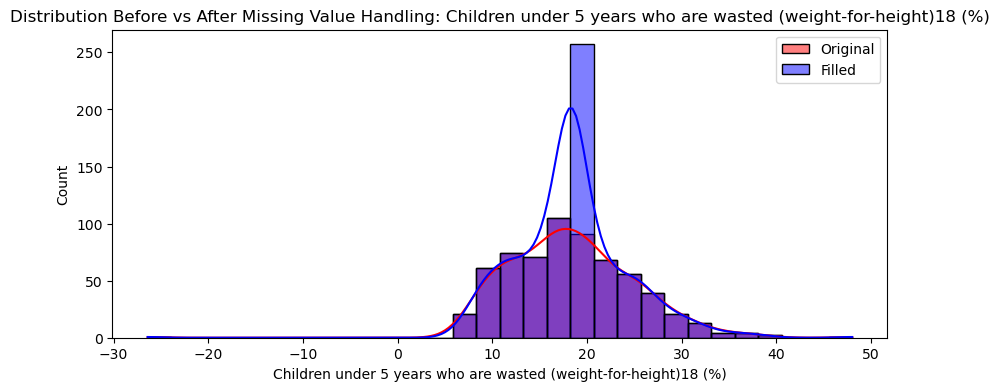

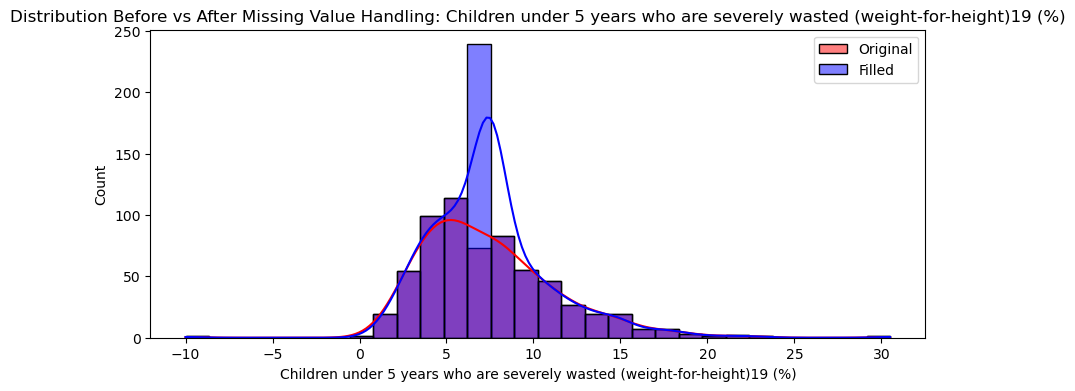

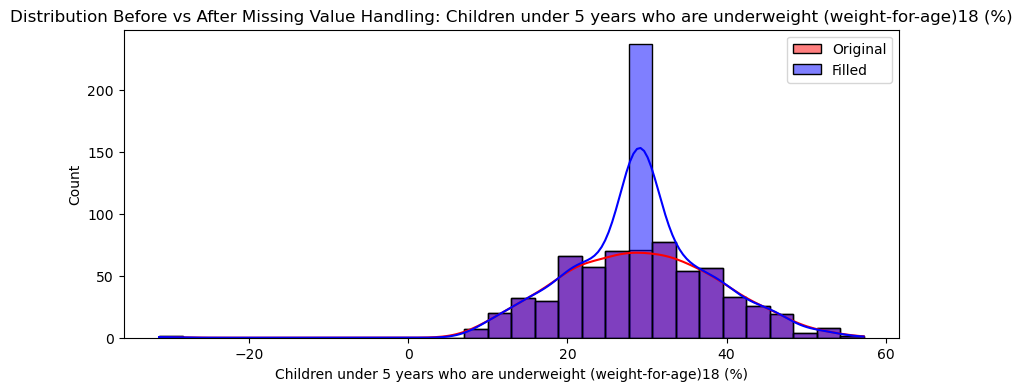

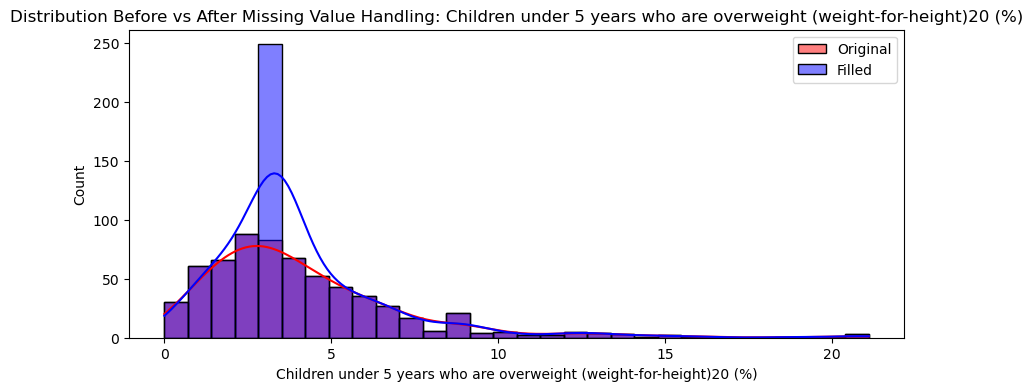

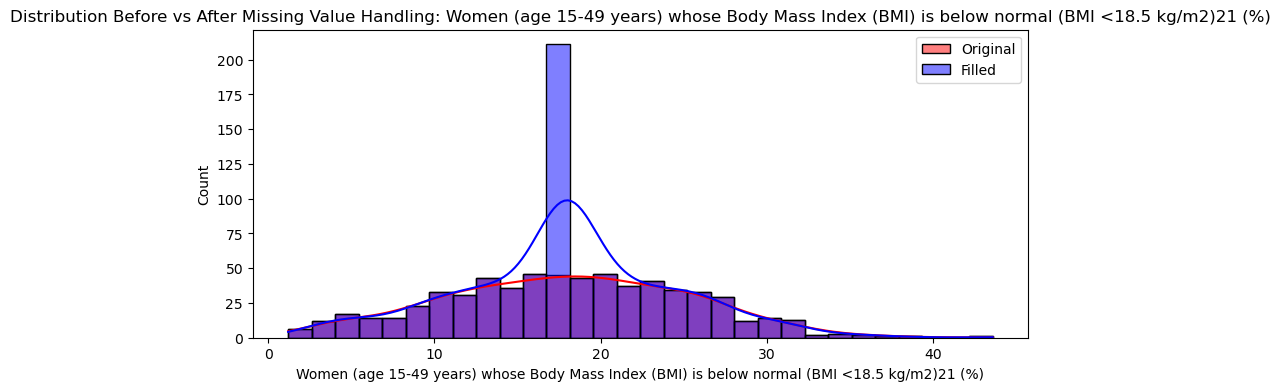

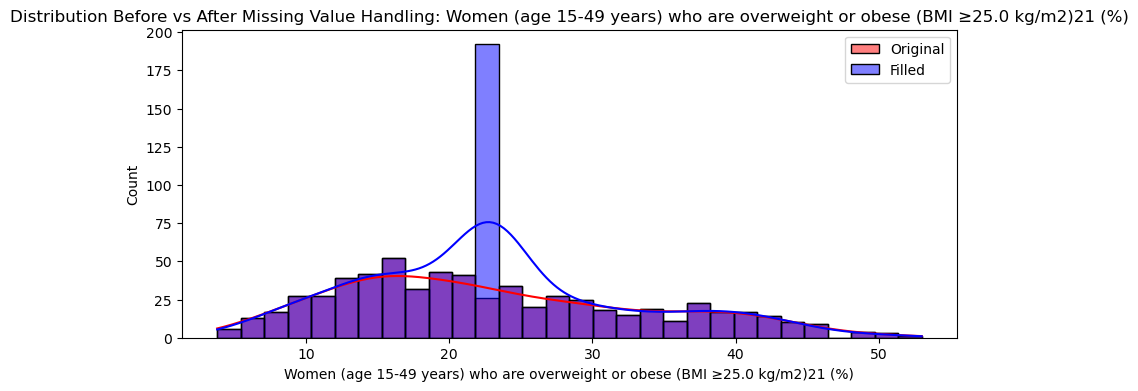

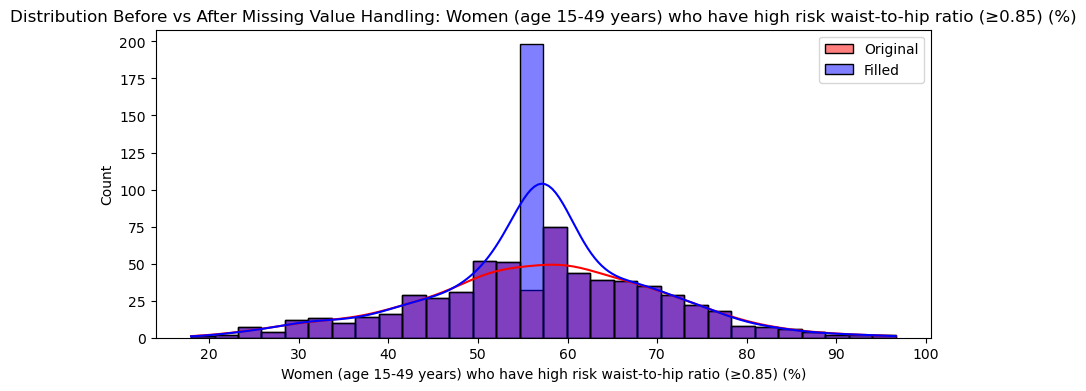

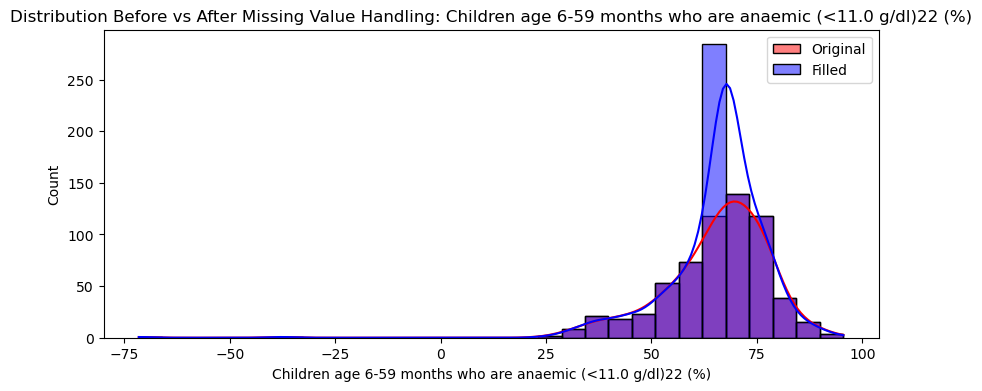

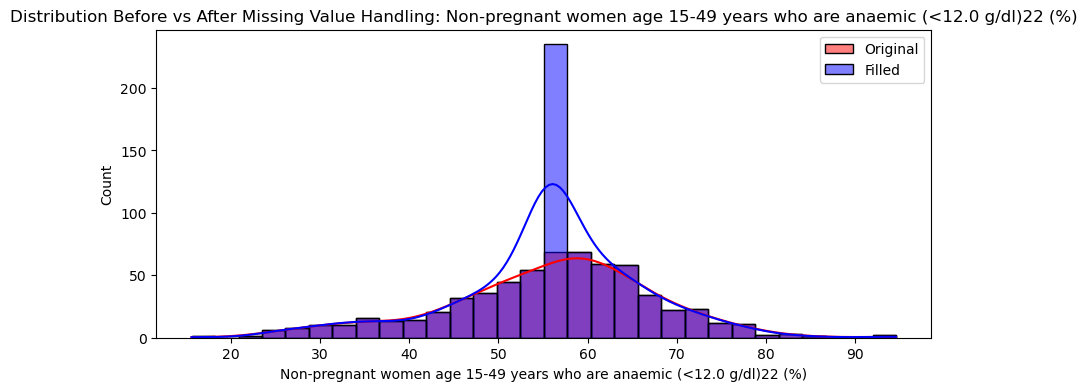

<Figure size 1000x400 with 0 Axes>

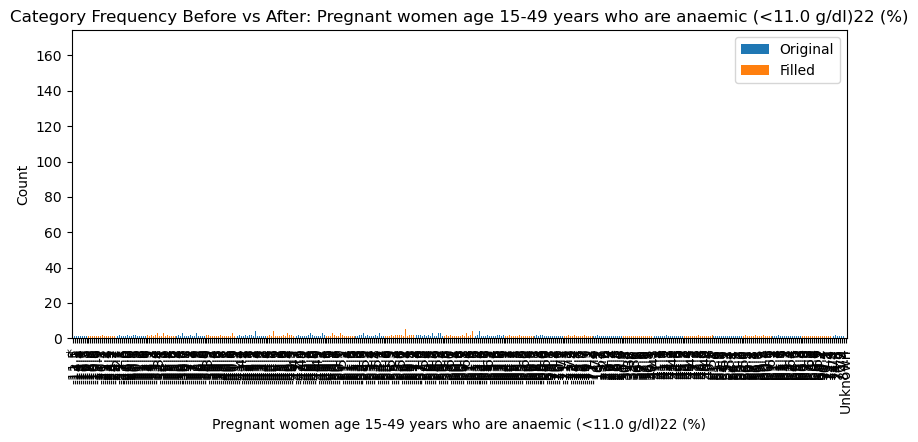

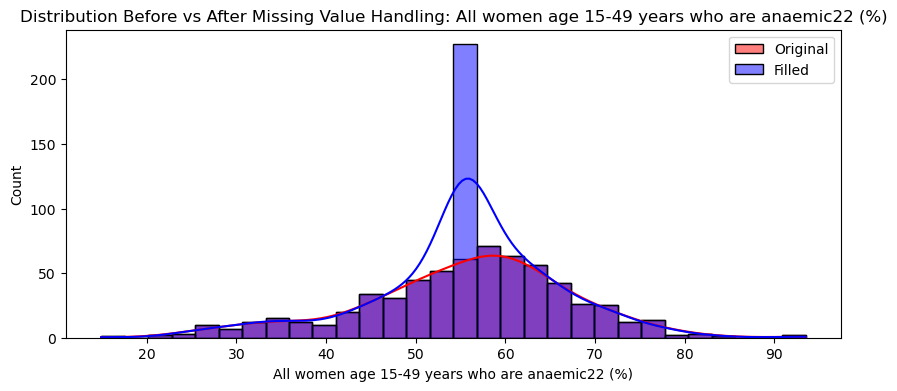

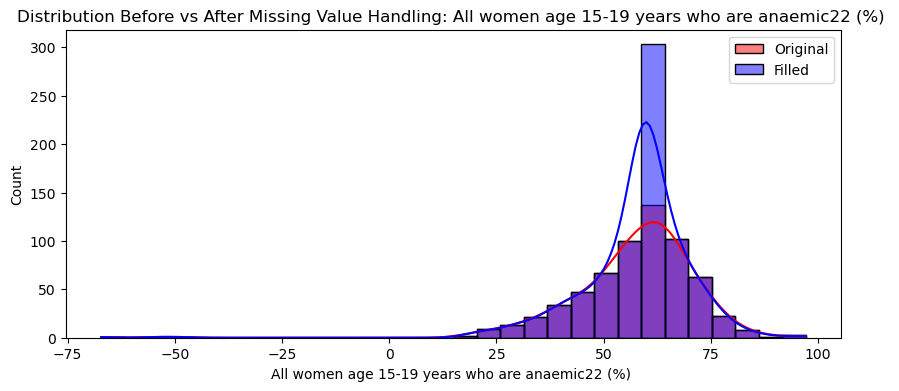

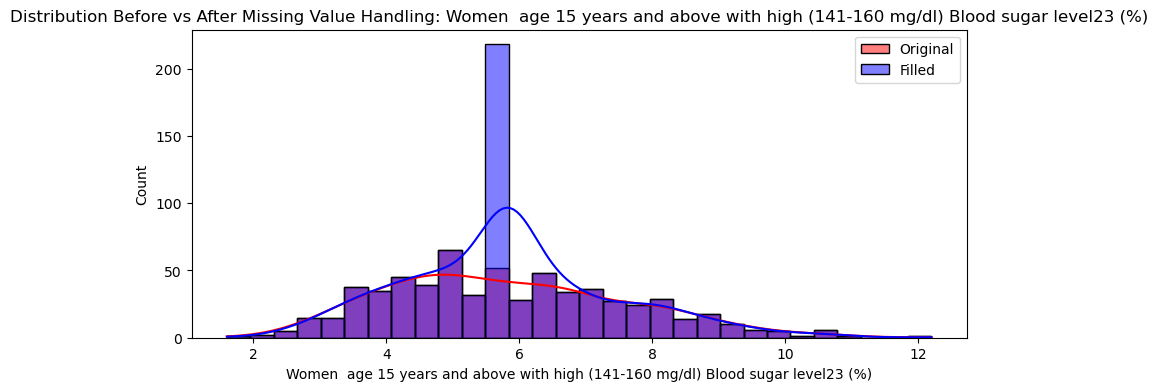

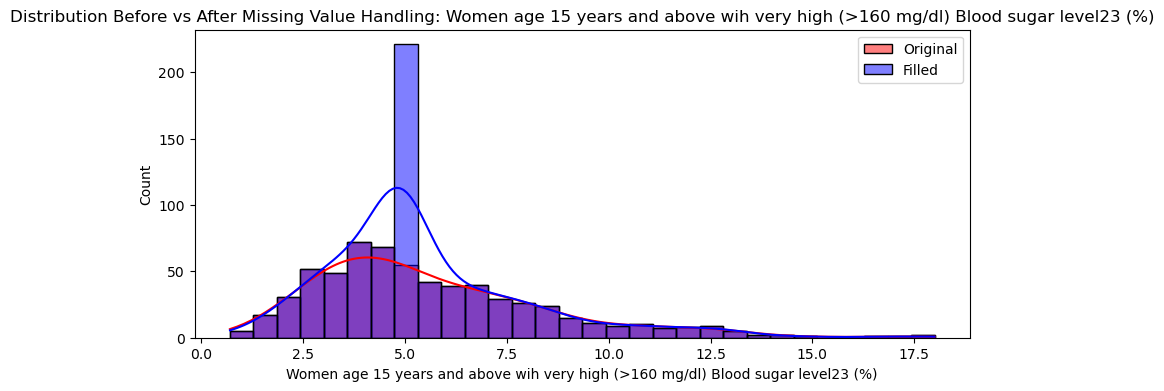

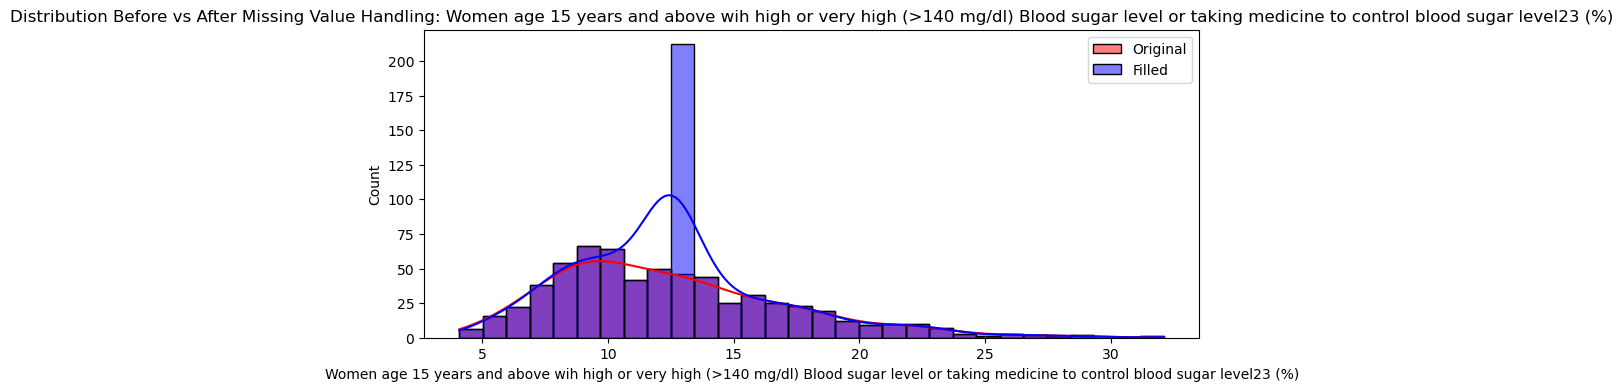

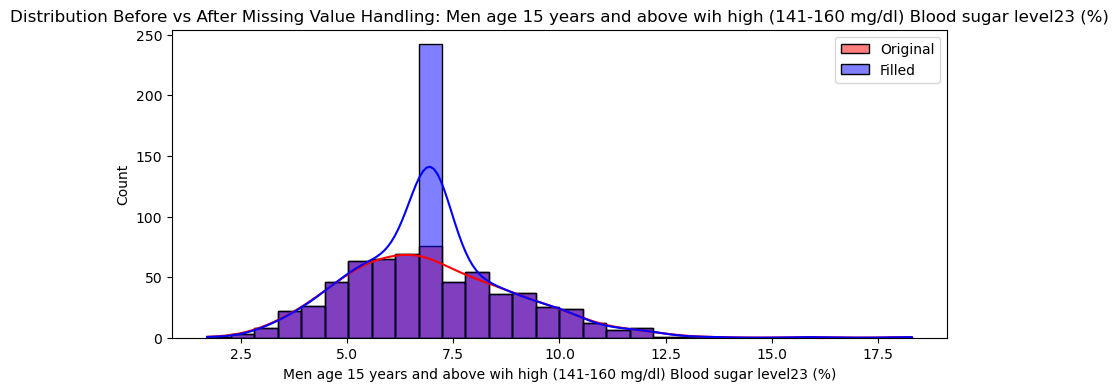

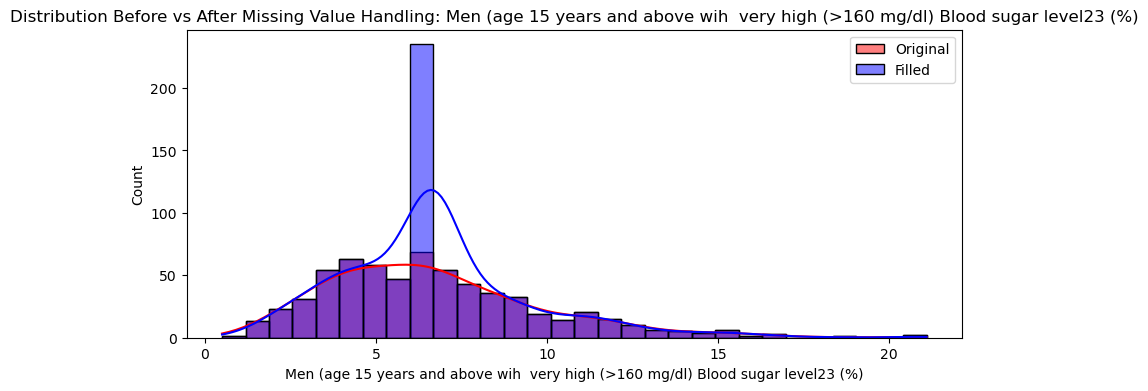

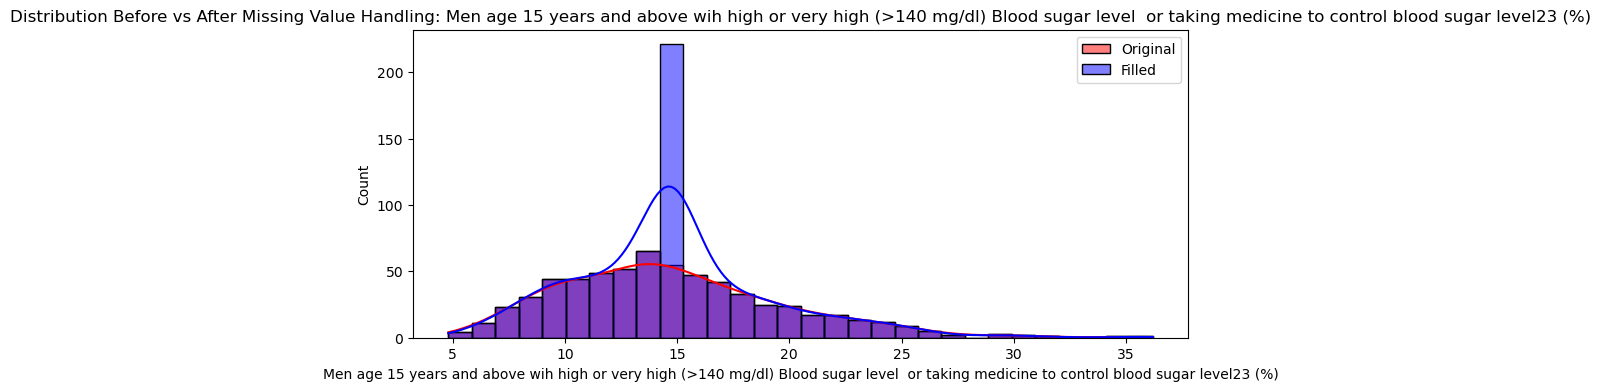

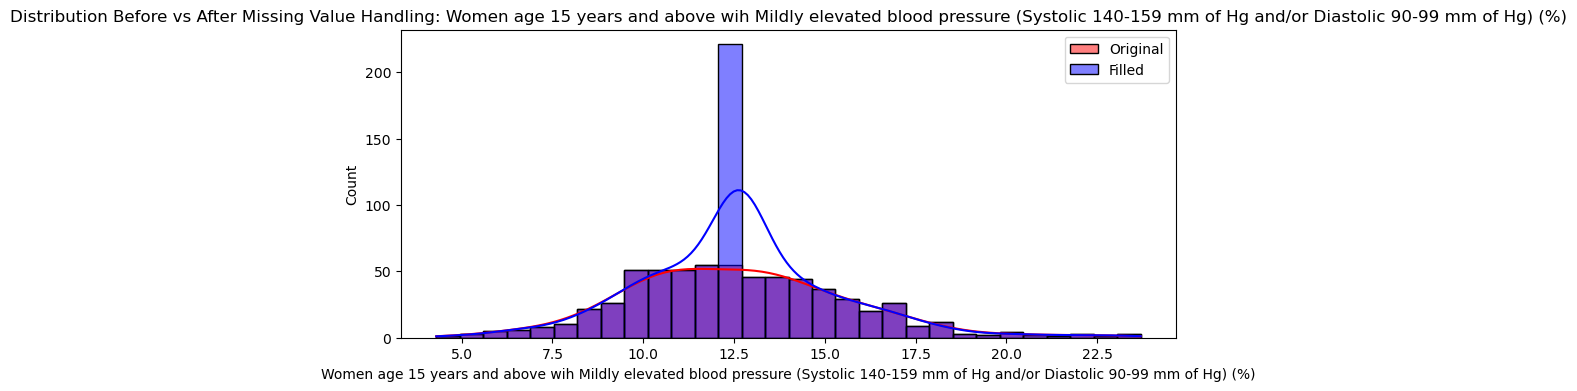

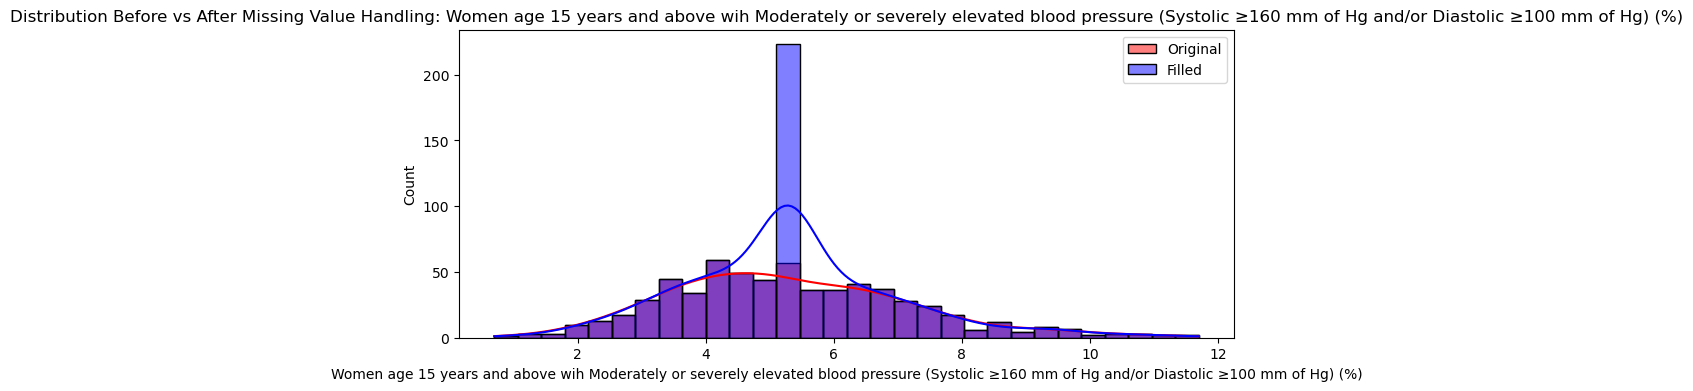

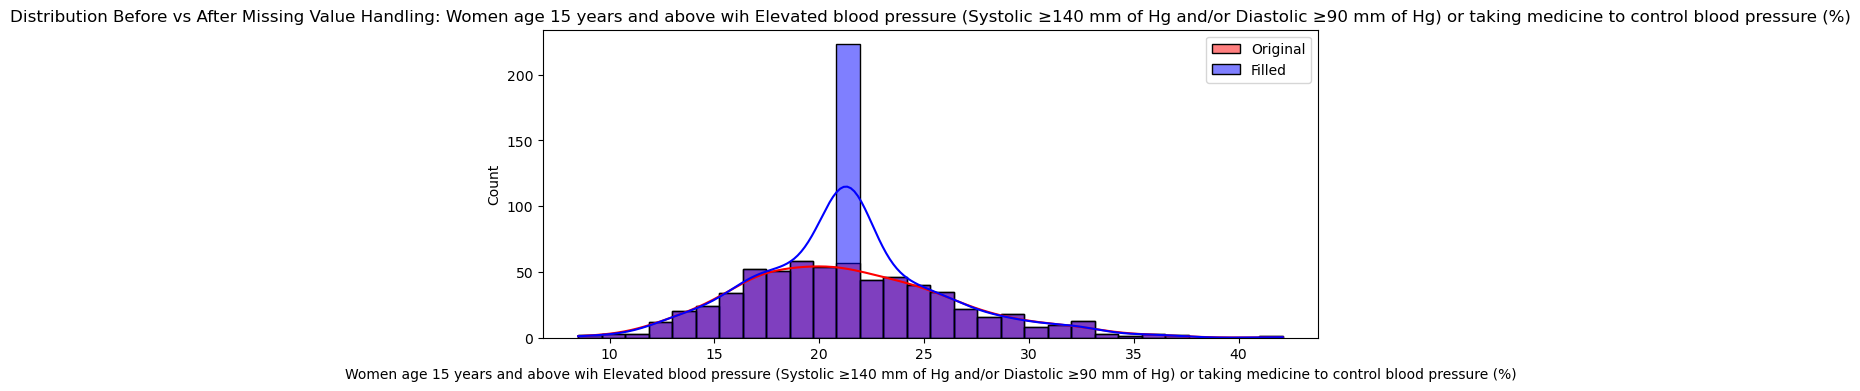

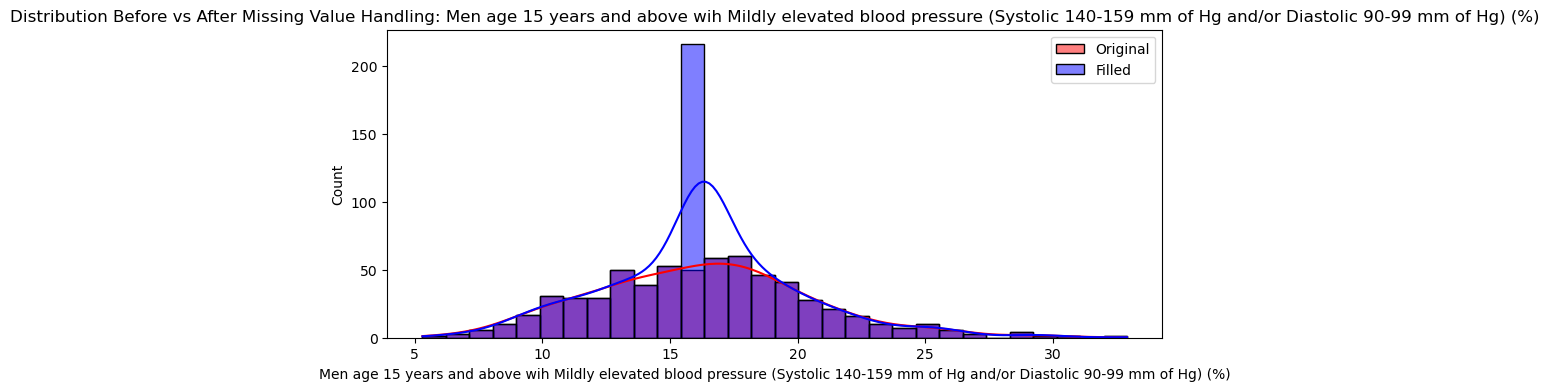

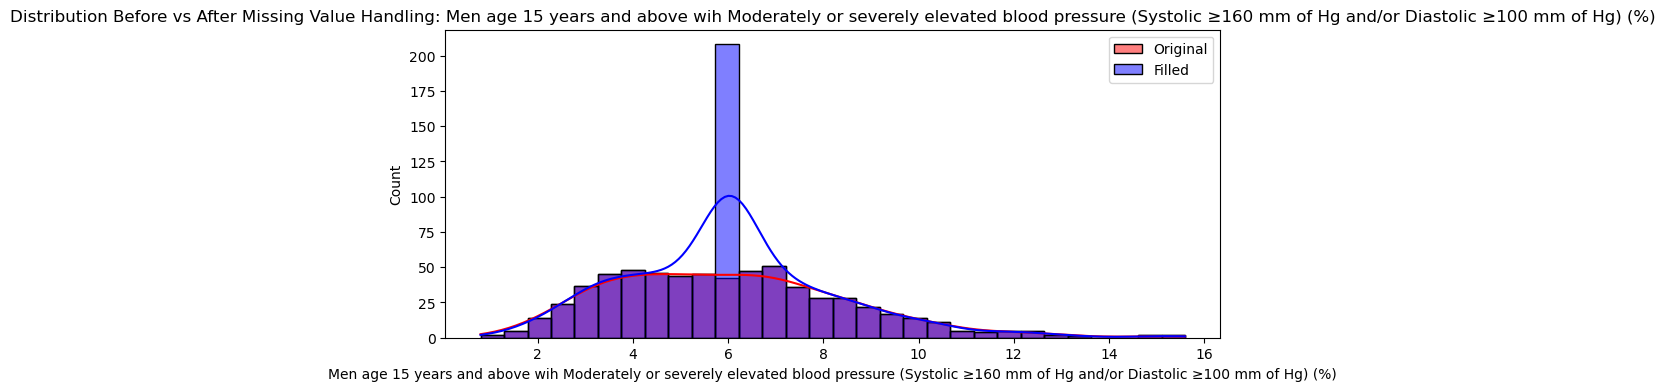

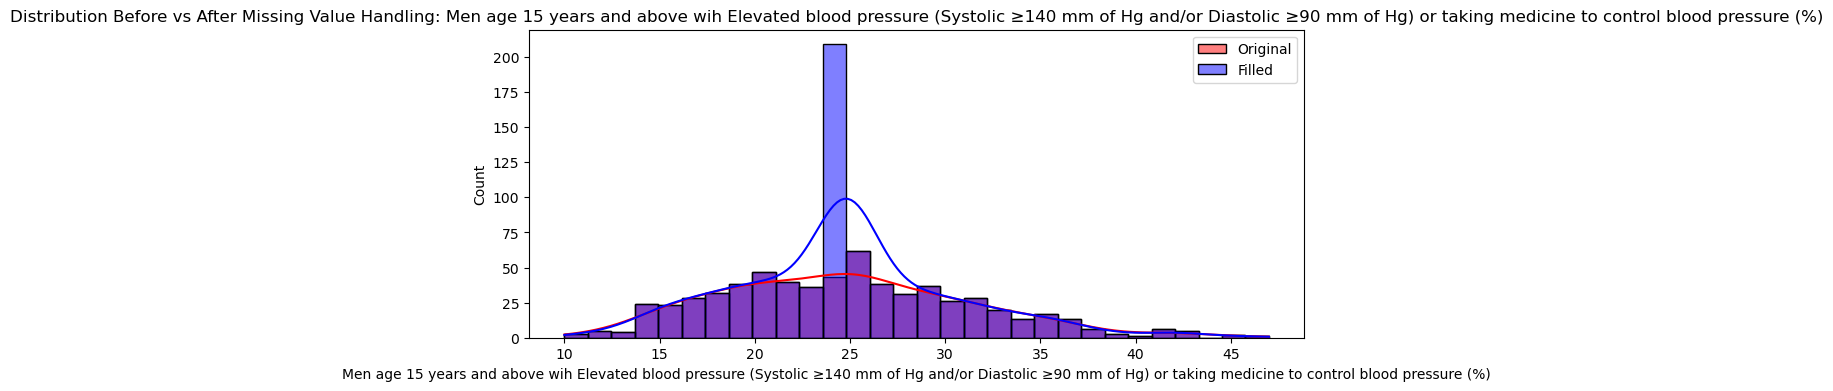

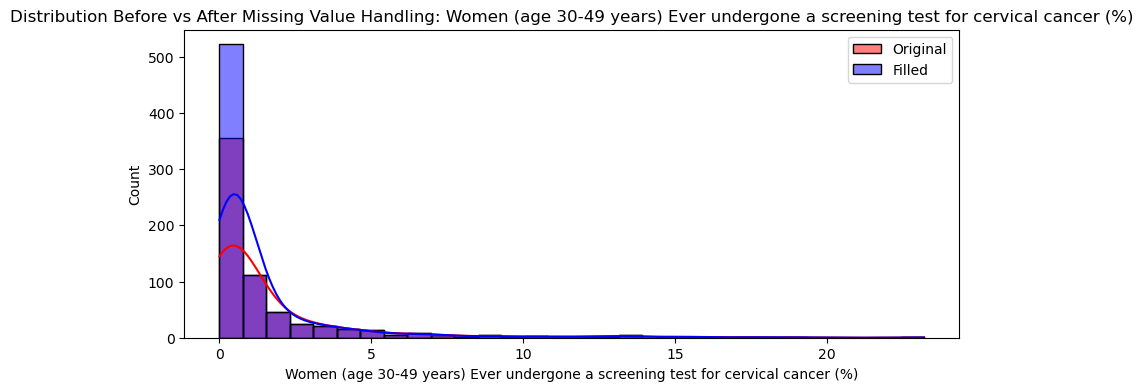

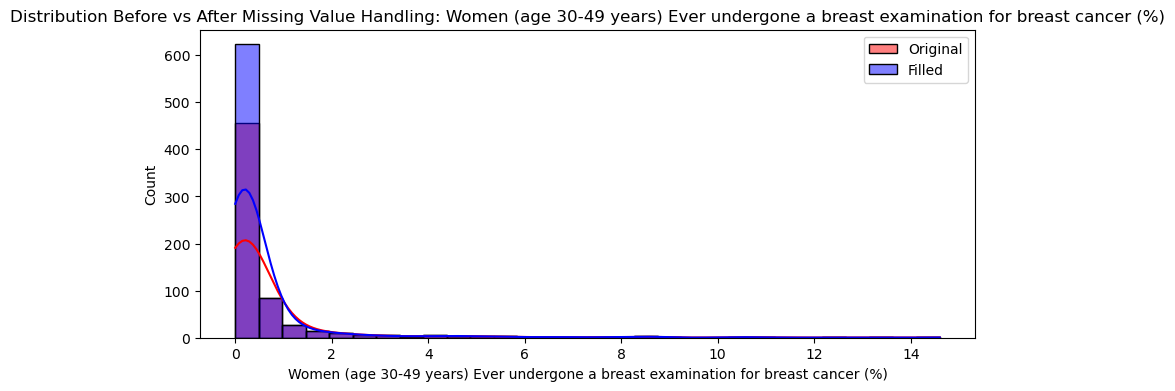

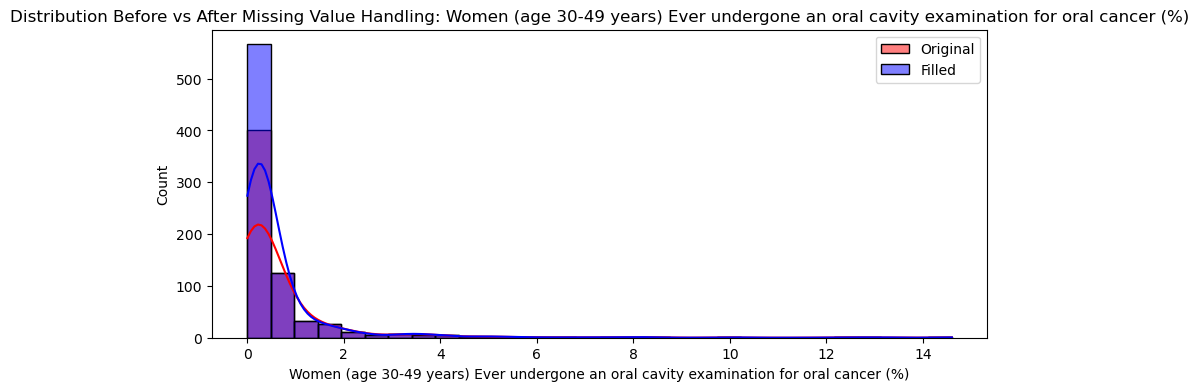

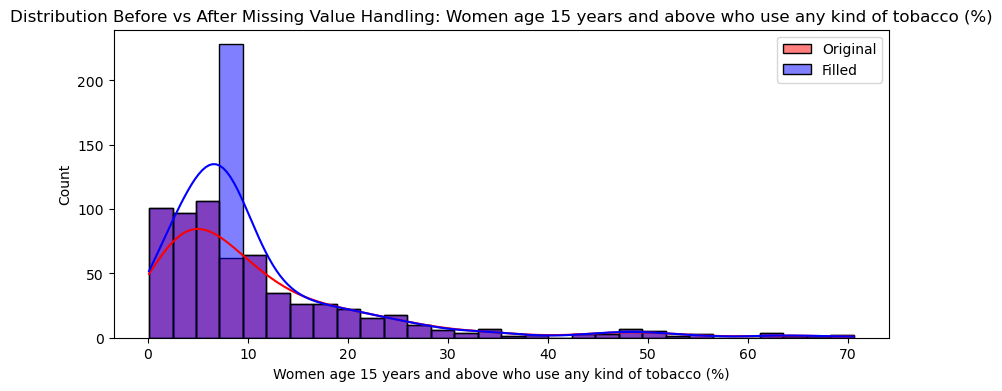

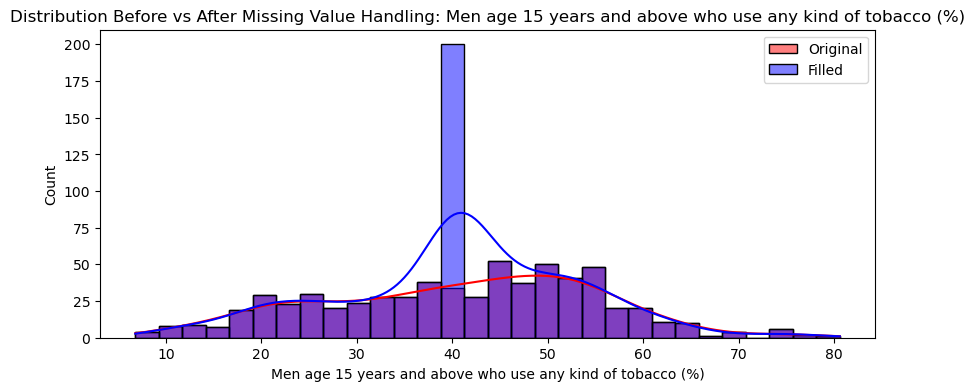

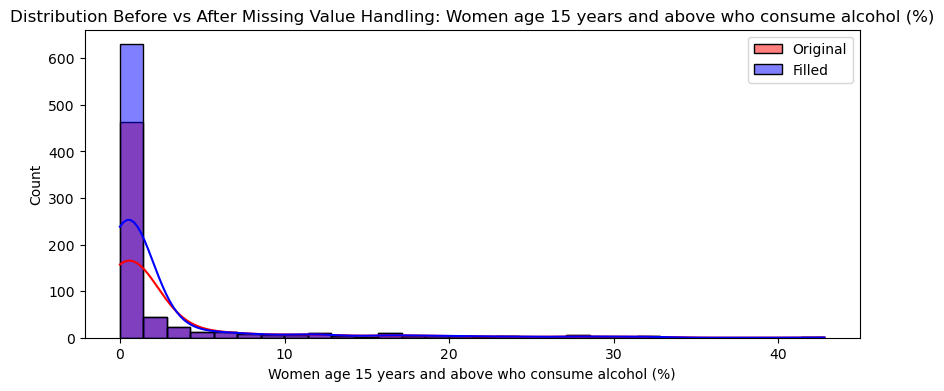

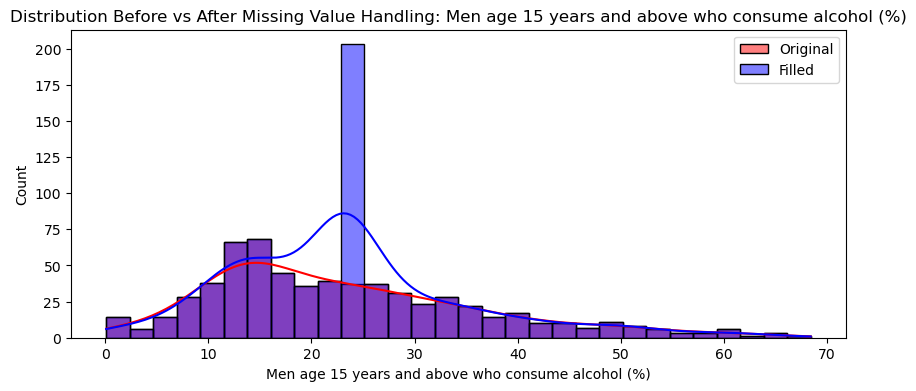

In [42]:
df_filled = fill_missing_values(df)  # Fill missing values
analyze_column_changes(df, df_filled)  # Analyze the changes


In [13]:
import pandas as pd

# Read the CSV files
df1 = pd.read_csv('NFHS_5_India_Districts_Factsheet_Data.csv')  # your main file
df2 = pd.read_csv('Indian_districts_all_2.csv',  encoding='ISO-8859-1')  # secondary file

# Merge using a common column, say 'common_column_name'
merged_df_pop = pd.merge(df1, df2, how='left', on='District Names')

# Save the merged dataframe to a new CSV file
merged_df_pop.to_csv('merged_file_pop.csv', index=False)


In [9]:
merged_df.head()

District Names                   State/UT  \
0                 Nicobars  Andaman & Nicobar Islands   
1  North & Middle Andaman   Andaman & Nicobar Islands   
2           South Andaman   Andaman & Nicobar Islands   
3              Srikakulam              Andhra Pradesh   
4            Vizianagaram              Andhra Pradesh   

   Number of Households surveyed  Number of Women age 15-49 years interviewed  \
0                            882                                          764   
1                            874                                          789   
2                            868                                          844   
3                            874                                          780   
4                            902                                          853   

   Number of Men age 15-54 years interviewed  \
0                                        125   
1                                        108   
2                                        134   
3                                        100   
4                                        134   

   Female population age 6 years and above who ever attended school (%)  \
0                                               78.0                      
1                                               82.7                      
2                                               84.7                      
3                                               60.0                      
4                                               56.0                      

   Population below age 15 years (%)  \
0                               23.0   
1                               19.8   
2                               21.0   
3                               20.7   
4                               20.6   

    Sex ratio of the total population (females per 1,000 males)  \
0                                                973              
1                                                950              
2                                                967              
3                                               1140              
4                                               1114              

   Sex ratio at birth for children born in the last five years (females per 1,000 males)  \
0                                                927                                       
1                                                844                                       
2                                                935                                       
3                                               1163                                       
4                                                898                                       

   Children under age 5 years whose birth was registered with the civil authority (%)  \
0                                               98.0                                    
1                                              100.0                                    
2                                               96.5                                    
3                                               95.0                                    
4                                               95.4                                    

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

  Men age 15 years and above wih Moderately or severely elevated blood pressure (Systolic ≥160 mm of Hg and/or Diastolic ≥100 mm of Hg) (%)  \
0                                               11.1                                                                                          
1                                                6.0                                                                                          
2                                                6.1                                                                                          
3                                                5.5                         

In [19]:
import pandas as pd

# Read both files
df1 = pd.read_csv('NFHS_5_India_Districts_Factsheet_Data.csv')  # your main file
df2 = pd.read_csv('Indian_districts_all_2.csv',  encoding='ISO-8859-1')  # secondary file

# Inspect column names
print("Columns in df1:", df1.columns)
print("Columns in df2:", df2.columns)

# Assuming the common column is 'District' (update if needed)
# Strip leading/trailing spaces and convert to lowercase to avoid mismatches
df1['District Names'] = df1['District Names'].str.strip().str.lower()
df2['District Names'] = df2['District Names'].str.strip().str.lower()

# Merge using a left join on cleaned district names
merged_df = pd.merge(df1, df2, how='left', on='District Names')

# Save the merged file
merged_df.to_csv('merged_file_population.csv', index=False)


Columns in df1: Index(['District Names', 'State/UT', 'Number of Households surveyed',
       'Number of Women age 15-49 years interviewed',
       'Number of Men age 15-54 years interviewed',
       'Female population age 6 years and above who ever attended school (%)',
       'Population below age 15 years (%)',
       ' Sex ratio of the total population (females per 1,000 males)',
       'Sex ratio at birth for children born in the last five years (females per 1,000 males)',
       'Children under age 5 years whose birth was registered with the civil authority (%)',
       ...
       'Men age 15 years and above wih Mildly elevated blood pressure (Systolic 140-159 mm of Hg and/or Diastolic 90-99 mm of Hg) (%)',
       'Men age 15 years and above wih Moderately or severely elevated blood pressure (Systolic ≥160 mm of Hg and/or Diastolic ≥100 mm of Hg) (%)',
       'Men age 15 years and above wih Elevated blood pressure (Systolic ≥140 mm of Hg and/or Diastolic ≥90 mm of Hg) or taking me

In [17]:
merged_df.head()

District Names                   State/UT  \
0                nicobars  Andaman & Nicobar Islands   
1  north & middle andaman  Andaman & Nicobar Islands   
2           south andaman  Andaman & Nicobar Islands   
3              srikakulam             Andhra Pradesh   
4            vizianagaram             Andhra Pradesh   

   Number of Households surveyed  Number of Women age 15-49 years interviewed  \
0                            882                                          764   
1                            874                                          789   
2                            868                                          844   
3                            874                                          780   
4                            902                                          853   

   Number of Men age 15-54 years interviewed  \
0                                        125   
1                                        108   
2                                        134   
3                                        100   
4                                        134   

   Female population age 6 years and above who ever attended school (%)  \
0                                               78.0                      
1                                               82.7                      
2                                               84.7                      
3                                               60.0                      
4                                               56.0                      

   Population below age 15 years (%)  \
0                               23.0   
1                               19.8   
2                               21.0   
3                               20.7   
4                               20.6   

    Sex ratio of the total population (females per 1,000 males)  \
0                                                973              
1                                                950              
2                                                967              
3                                               1140              
4                                               1114              

   Sex ratio at birth for children born in the last five years (females per 1,000 males)  \
0                                                927                                       
1                                                844                                       
2                                                935                                       
3                                               1163                                       
4                                                898                                       

   Children under age 5 years whose birth was registered with the civil authority (%)  \
0                                               98.0                                    
1                                              100.0                                    
2                                               96.5                                    
3                                               95.0                                    
4                                               95.4                                    

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

  Men age 15 years and above wih Moderately or severely elevated blood pressure (Systolic ≥160 mm of Hg and/or Diastolic ≥100 mm of Hg) (%)  \
0                                               11.1                                                                                          
1                                                6.0                                                                                          
2                                                6.1                                                                                          
3                                                5.5                              

In [21]:
!pip install rapidfuzz


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [63]:
import pandas as pd
from rapidfuzz import process, fuzz

# Read CSVs
df1 = pd.read_csv('NFHS_5_India_Districts_Factsheet_Data.csv')
df2 = pd.read_csv('Indian_districts_all_2.csv', encoding='ISO-8859-1')

# Clean and standardize district names
df1['District Names'] = df1['District Names'].str.strip().str.lower()
df2['District Names'] = df2['District Names'].str.strip().str.lower()

# Create a mapping from df1's district to best match in df2
matches = df1['District Names'].apply(
    lambda x: process.extractOne(x, df2['District Names'], scorer=fuzz.token_sort_ratio)
)

# Create a new column in df1 with matched names from df2
df1['matched_district'] = matches.apply(lambda x: x[0] if x[1] >= 85 else None)  # You can adjust threshold (85)

# Merge df1 with df2 using matched_district and df2's 'District Names'
merged_df = pd.merge(df1, df2, left_on='matched_district', right_on='District Names', how='left', suffixes=('', '_df2'))

# # Save final merged file
# merged_df.to_csv('merged_file_population_fuzzy.csv', index=False)


In [67]:
# Drop the specified columns
merged_df = merged_df.drop(columns=['matched_district', 'District Names_df2'])

# Save the cleaned dataset
merged_df.to_csv('NFHS_with_population.csv',index=False)

print("Final dataset saved as 'final_cleaned_dataset.csv' without the specified columns.")

Final dataset saved as 'final_cleaned_dataset.csv' without the specified columns.


In [69]:
merged_df.shape

(717, 110)

In [51]:
missing_population_count = merged_df['Population'].isna().sum()
print(f"Total missing values in 'population' column: {missing_population_count}")


Total missing values in 'population' column: 92


In [73]:
# Separate rows with and without population data
df_with_pop = merged_df[merged_df['Population'].notna()].copy()
df_without_pop = merged_df[merged_df['Population'].isna()].copy()

# Ensure population is numeric
df_with_pop['Population'] = pd.to_numeric(df_with_pop['Population'], errors='coerce')

# Sort by population (descending)
df_with_pop_sorted = df_with_pop.sort_values(by='Population', ascending=False)

# Determine how many to keep (bottom 60%)
keep_count = int(len(df_with_pop_sorted) * 0.70)

# Select bottom 60%
bottom_60_pop_df = df_with_pop_sorted.tail(keep_count)

# Combine with rows that had missing population
final_df = pd.concat([bottom_60_pop_df, df_without_pop], ignore_index=True)

# Save or inspect
print(f"Total districts in final dataset: {len(final_df)}")
# final_df.to_csv('districts_bottom_60_percent_plus_missing.csv', index=False)


Total districts in final dataset: 529


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15608\2566109279.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([bottom_60_pop_df, df_without_pop], ignore_index=True)


In [75]:
final_df.head()

District Names        State/UT  Number of Households surveyed  \
0    farrukhabad   Uttar Pradesh                            969   
1    krishnagiri      Tamil Nadu                            922   
2       chittoor  Andhra Pradesh                            865   
3  kanniyakumari      Tamil Nadu                            839   
4       mainpuri   Uttar Pradesh                            976   

   Number of Women age 15-49 years interviewed  \
0                                         1276   
1                                          909   
2                                          828   
3                                          711   
4                                         1258   

   Number of Men age 15-54 years interviewed  \
0                                        175   
1                                        130   
2                                        121   
3                                        103   
4                                        168   

   Female population age 6 years and above who ever attended school (%)  \
0                                               67.1                      
1                                               72.6                      
2                                               65.6                      
3                                               92.9                      
4                                               74.6                      

   Population below age 15 years (%)  \
0                               32.7   
1                               24.2   
2                               22.6   
3                               20.8   
4                               30.9   

    Sex ratio of the total population (females per 1,000 males)  \
0                                                972              
1                                               1053              
2                                               1024              
3                                               1121              
4                                               1016              

   Sex ratio at birth for children born in the last five years (females per 1,000 males)  \
0                                                789                                       
1                                                857                                       
2                                               1019                                       
3                                                880                                       
4                                                837                                       

   Children under age 5 years whose birth was registered with the civil authority (%)  \
0                                               67.7                                    
1                                               98.7                                    
2                                               94.7                                    
3                                               98.9                                    
4                                               63.4                                    

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

  Men age 15 years and above wih Moderately or severely elevated blood pressure (Systolic ≥160 mm of Hg and/or Diastolic ≥100 mm of Hg) (%)  \
0                                                1.9                                                                                          
1                                                7.3                                                                                          
2                                                5.9                                                                                          
3                                                6.1                                                                                          
4                                                3

In [79]:
# Drop the specified columns
# final_df = final_df.drop(columns=['matched_district', 'District Names_df2'])

# Save the cleaned dataset
final_df.to_csv('NFHS_bottom70.csv', index=False)

print("Final dataset saved as 'final_cleaned_dataset.csv' without the specified columns.")


Final dataset saved as 'final_cleaned_dataset.csv' without the specified columns.


In [81]:
final_df.head()

District Names        State/UT  Number of Households surveyed  \
0    farrukhabad   Uttar Pradesh                            969   
1    krishnagiri      Tamil Nadu                            922   
2       chittoor  Andhra Pradesh                            865   
3  kanniyakumari      Tamil Nadu                            839   
4       mainpuri   Uttar Pradesh                            976   

   Number of Women age 15-49 years interviewed  \
0                                         1276   
1                                          909   
2                                          828   
3                                          711   
4                                         1258   

   Number of Men age 15-54 years interviewed  \
0                                        175   
1                                        130   
2                                        121   
3                                        103   
4                                        168   

   Female population age 6 years and above who ever attended school (%)  \
0                                               67.1                      
1                                               72.6                      
2                                               65.6                      
3                                               92.9                      
4                                               74.6                      

   Population below age 15 years (%)  \
0                               32.7   
1                               24.2   
2                               22.6   
3                               20.8   
4                               30.9   

    Sex ratio of the total population (females per 1,000 males)  \
0                                                972              
1                                               1053              
2                                               1024              
3                                               1121              
4                                               1016              

   Sex ratio at birth for children born in the last five years (females per 1,000 males)  \
0                                                789                                       
1                                                857                                       
2                                               1019                                       
3                                                880                                       
4                                                837                                       

   Children under age 5 years whose birth was registered with the civil authority (%)  \
0                                               67.7                                    
1                                               98.7                                    
2                                               94.7                                    
3                                               98.9                                    
4                                               63.4                                    

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

  Men age 15 years and above wih Moderately or severely elevated blood pressure (Systolic ≥160 mm of Hg and/or Diastolic ≥100 mm of Hg) (%)  \
0                                                1.9                                                                                          
1                                                7.3                                                                                          
2                                                5.9                                                                                          
3                                                6.1                                                                                          
4                                                3

In [83]:
final_df.shape

(529, 110)